## Data Cleaning for Original Datasets

In [77]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from PIL import Image 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
# Defining base paths for Tifinagh and Latin Amazigh datasets
base_path = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP"
tifinagh_csv_path = os.path.join(base_path, "MNIST-BERBER/Tifinagh-version/Tifinagh-version.csv")
latin_amazigh_csv_path = os.path.join(base_path, "MNIST-BERBER/Latin-version/Latin-version.csv")

tifinagh_data = pd.read_csv(tifinagh_csv_path, header=None)
latin_amazigh_data = pd.read_csv(latin_amazigh_csv_path, header=None)

# Data Labelling

In [17]:
# Defining pixel column names 28x28 images
pixel_columns = [f'pixel_{i}' for i in range(784)]  # 784 = 28x28

tifinagh_data.columns = pixel_columns + ['label']
latin_amazigh_data.columns = pixel_columns + ['label']

In [19]:
print("\nUnique labels in Tifinagh dataset:", tifinagh_data['label'].unique())
print("Unique labels in Latin Amazigh dataset:", latin_amazigh_data['label'].unique())


Unique labels in Tifinagh dataset: [0 3 1 4 2 5 6 7]
Unique labels in Latin Amazigh dataset: [0]


In [20]:
tifinagh_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,1,0,0,2,0,3,0,1,1,...,0,0,4,0,0,0,0,0,0,0
1,0,3,0,1,2,0,0,0,1,0,...,0,1,4,1,0,0,0,0,0,0
2,0,1,0,0,0,2,0,0,1,0,...,0,0,3,1,0,0,0,0,0,0
3,0,0,0,0,0,3,0,0,0,0,...,3,0,0,2,0,0,0,0,0,0
4,0,0,2,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [21]:
latin_amazigh_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tifinagh_data.to_csv('tifinagh_with_column_names.csv', index=False)
latin_amazigh_data.to_csv('latin_amazigh_with_column_names.csv', index=False)


## Data Cleaning

In [25]:
# Checking for missing values in Tifinagh Dataset
print("Missing Values in Tifinagh Dataset:")
missing_tifinagh = tifinagh_data.isnull().sum()

if missing_tifinagh.sum() > 0:
    print(missing_tifinagh)
else:
    print("No missing data in Tifinagh Dataset.")

# Checking for missing values in Latin Dataset
print("\nMissing Values in Latin Dataset:")
missing_latin = latin_amazigh_data.isnull().sum()

if missing_latin.sum() > 0:
    print(missing_latin)
else:
    print("No missing data in Latin Dataset.")

tifinagh_data.dropna(inplace=True)
latin_amazigh_data.dropna(inplace=True)

Missing Values in Tifinagh Dataset:
No missing data in Tifinagh Dataset.

Missing Values in Latin Dataset:
No missing data in Latin Dataset.


In [27]:
# Checking for duplicates before removing
tifinagh_duplicates_before = tifinagh_data.duplicated().sum()
latin_duplicates_before = latin_amazigh_data.duplicated().sum()

print(f"Duplicates before removing:")
print(f"Tifinagh Dataset: {tifinagh_duplicates_before} duplicates")
print(f"Latin Dataset: {latin_duplicates_before} duplicates")


Duplicates before removing:
Tifinagh Dataset: 84 duplicates
Latin Dataset: 9116 duplicates


In [28]:
# Removing duplicate rows
tifinagh_data.drop_duplicates(inplace=True)
latin_amazigh_data.drop_duplicates(inplace=True)

print("\nDuplicates removed. New dataset sizes:")
print(f"Tifinagh Dataset: {len(tifinagh_data)} samples")
print(f"Latin Dataset: {len(latin_amazigh_data)} samples")



Duplicates removed. New dataset sizes:
Tifinagh Dataset: 25656 samples
Latin Dataset: 238869 samples


In [29]:
print(tifinagh_data.columns)
print(latin_amazigh_data.columns)


Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'label'],
      dtype='object', length=785)
Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'label'],
      dtype='object', length=785)


In [32]:
# Checking data types
print("\nTifinagh Dataset Data Types:")
print(tifinagh_data.dtypes)

print("\nLatin Dataset Data Types:")
print(latin_amazigh_data.dtypes)
 
tifinagh_data['label'] = tifinagh_data['label'].astype('category')
latin_amazigh_data['label'] = latin_amazigh_data['label'].astype('category')



Tifinagh Dataset Data Types:
pixel_0         int64
pixel_1         int64
pixel_2         int64
pixel_3         int64
pixel_4         int64
               ...   
pixel_780       int64
pixel_781       int64
pixel_782       int64
pixel_783       int64
label        category
Length: 785, dtype: object

Latin Dataset Data Types:
pixel_0         int64
pixel_1         int64
pixel_2         int64
pixel_3         int64
pixel_4         int64
               ...   
pixel_780       int64
pixel_781       int64
pixel_782       int64
pixel_783       int64
label        category
Length: 785, dtype: object


# Image conversion

In [55]:
# Defining paths
csv_file_path = r"C:\Users\bouad\OneDrive\Bureau\Amazigh NLP\MNIST-BERBER\Tifinagh-version\Tifinagh-version.csv"  # Adjust the path as necessary

image_folder_path = "imgT"

Alphabet_list = ["ⴰ","ⴱ","ⵛ","ⴷ","ⴹ","ⵄ","ⴼ","ⴳ","ⵖ","ⴳⵯ","ⵀ","ⵃ","ⵊ","ⴽ","ⴽⵯ","ⵍ","ⵎ","ⵏ","ⵇ","ⵔ","ⵕ","ⵙ","ⵚ","ⵜ","ⵟ",
                 "ⵡ","ⵅ","ⵢ","ⵣ","ⵥ","ⴻ","ⵉ","ⵓ"]

In [56]:
# Creating directories for each alphabet
for alphabet in Alphabet_list:
    path = os.path.join(image_folder_path, alphabet)
    if not os.path.exists(path):
        os.makedirs(path)

In [57]:
last_digit_Name = None

with open(csv_file_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in reader:
        digit_Name = row.pop(0)
        image_array = np.asarray(row, dtype=np.uint8)  # Ensure the array is of type uint8
        image_array = image_array.reshape(28, 28)  # Reshape to 28x28
        new_image = Image.fromarray(image_array)

        if last_digit_Name != Alphabet_list[int(digit_Name)]:
            last_digit_Name = Alphabet_list[int(digit_Name)]
            count = 0
            print("")
            print("Processing Alphabet - " + last_digit_Name)

        image_path = os.path.join(image_folder_path, last_digit_Name, f"{last_digit_Name}-{count}.png")
        new_image.save(image_path)
        count += 1

        if count % 1000 == 0:
            print("Images processed: " + str(count))

print("Processing complete.")


Processing Alphabet - ⴰ

Processing Alphabet - ⴱ

Processing Alphabet - ⵛ

Processing Alphabet - ⴷ

Processing Alphabet - ⴹ

Processing Alphabet - ⵄ

Processing Alphabet - ⴼ

Processing Alphabet - ⴳ

Processing Alphabet - ⵖ

Processing Alphabet - ⴳⵯ

Processing Alphabet - ⵀ

Processing Alphabet - ⵃ

Processing Alphabet - ⵊ

Processing Alphabet - ⴽ

Processing Alphabet - ⴽⵯ

Processing Alphabet - ⵍ

Processing Alphabet - ⵎ

Processing Alphabet - ⵏ

Processing Alphabet - ⵇ

Processing Alphabet - ⵔ

Processing Alphabet - ⵕ

Processing Alphabet - ⵙ

Processing Alphabet - ⵚ

Processing Alphabet - ⵜ

Processing Alphabet - ⵟ

Processing Alphabet - ⵡ

Processing Alphabet - ⵅ

Processing Alphabet - ⵢ

Processing Alphabet - ⵣ

Processing Alphabet - ⵥ

Processing Alphabet - ⴻ

Processing Alphabet - ⵉ

Processing Alphabet - ⵓ
Processing complete.


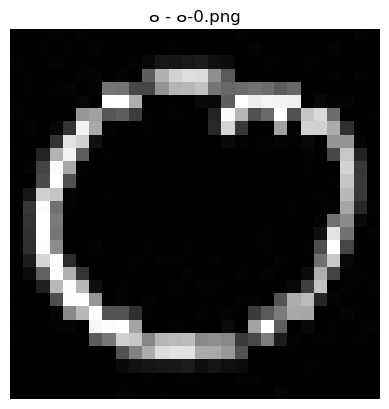

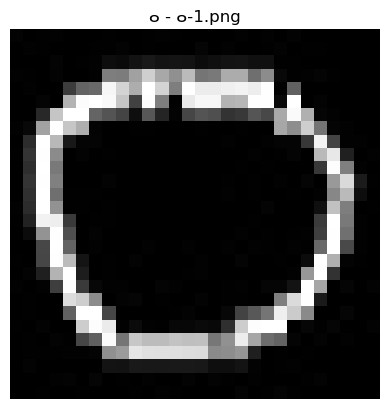

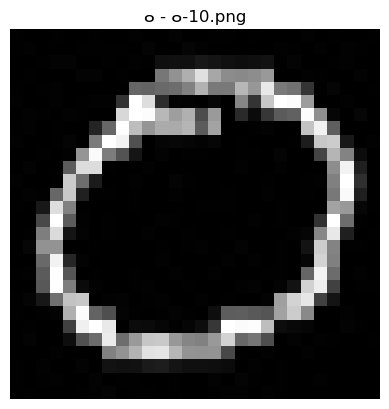

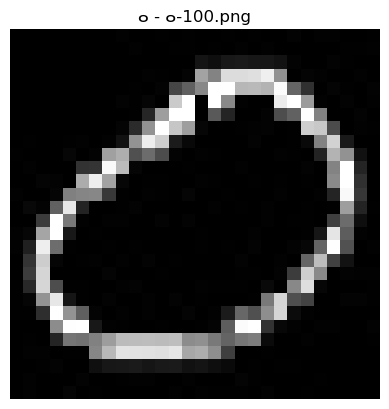

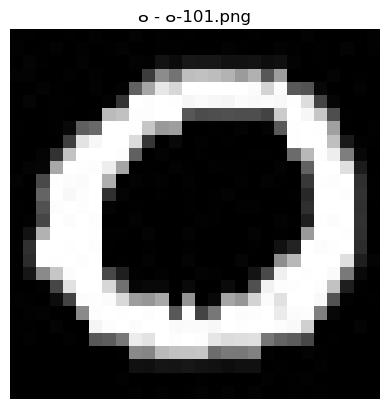

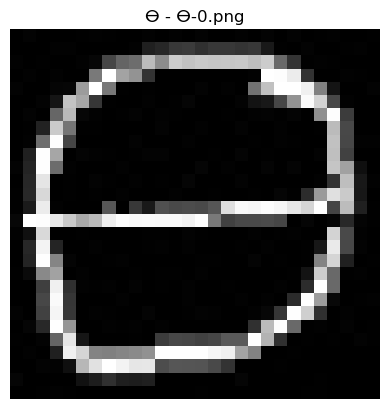

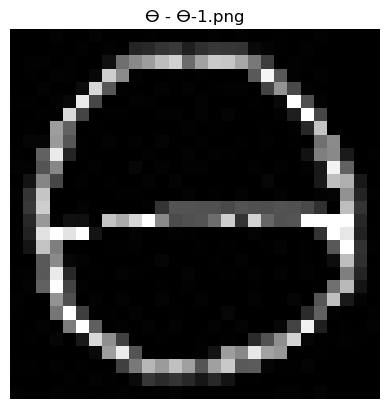

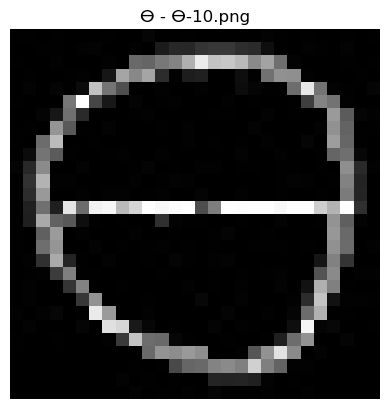

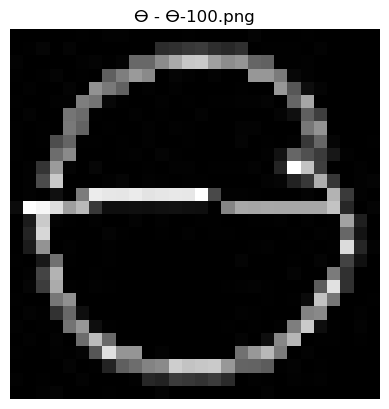

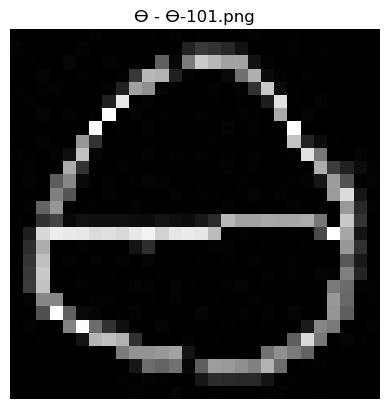

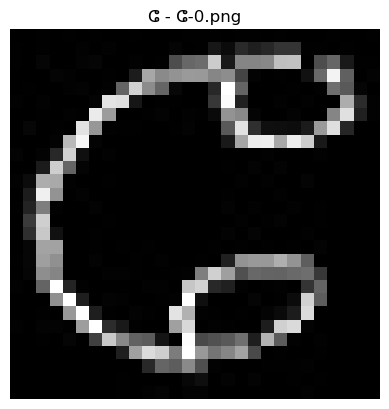

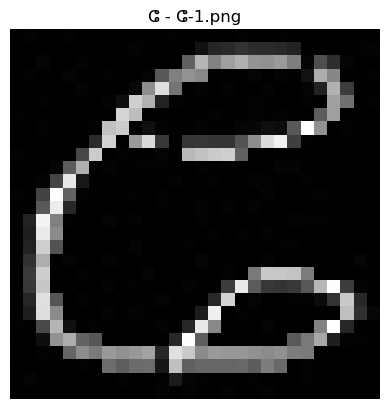

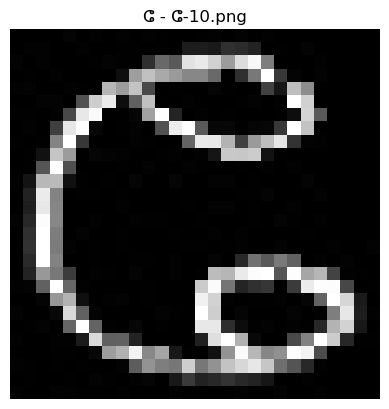

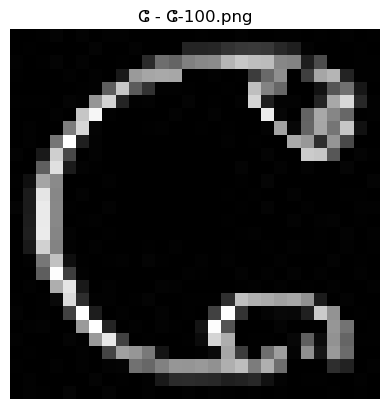

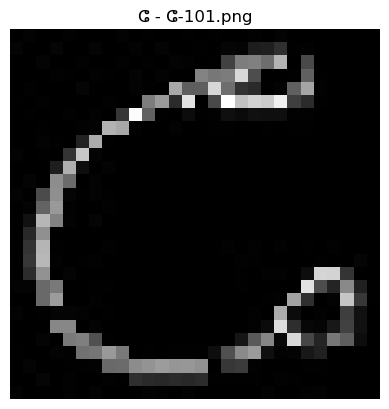

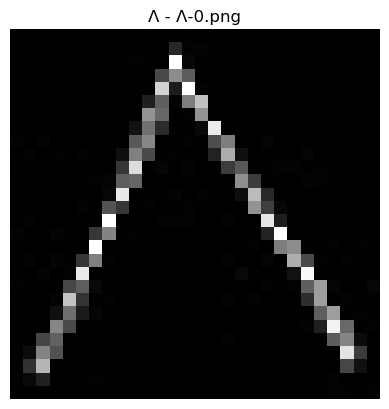

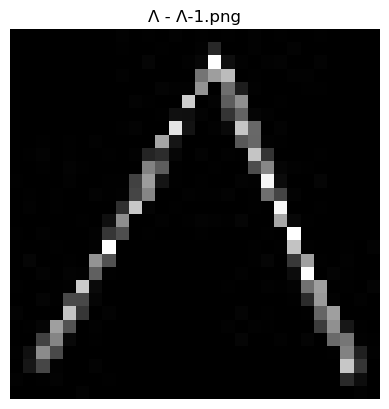

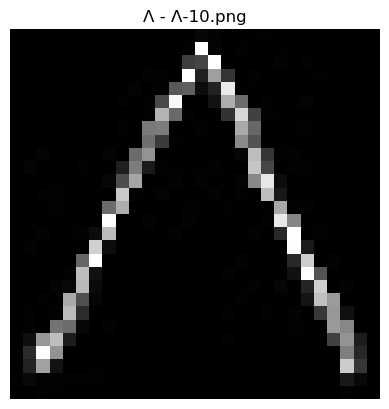

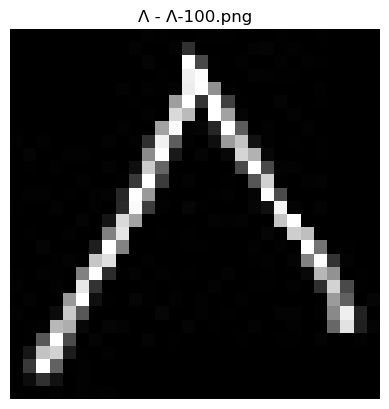

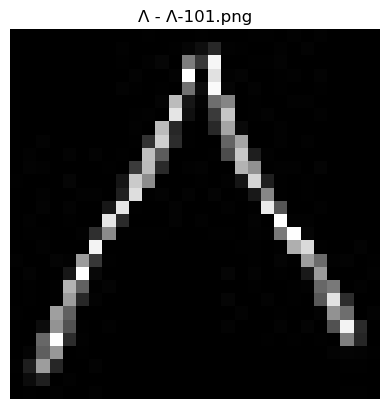

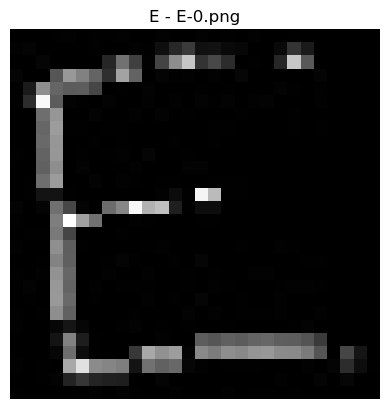

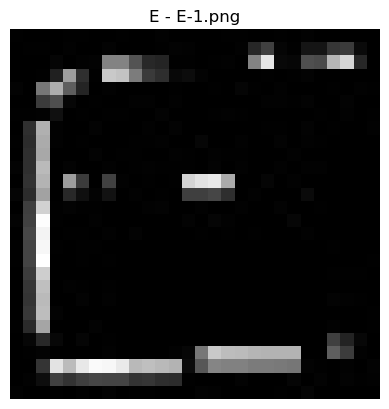

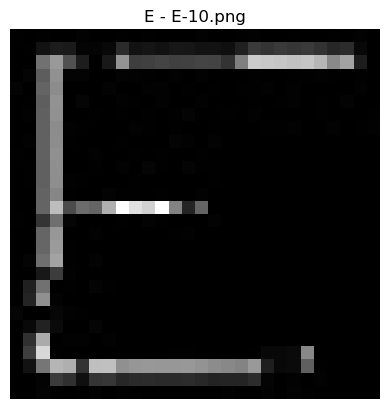

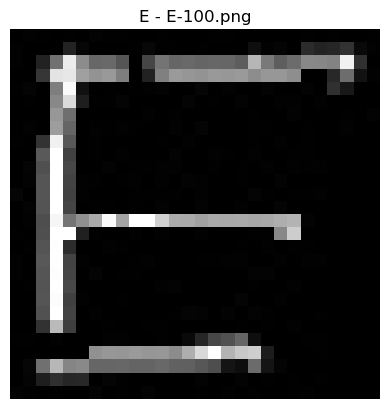

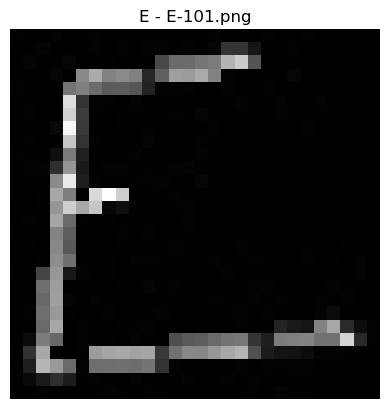

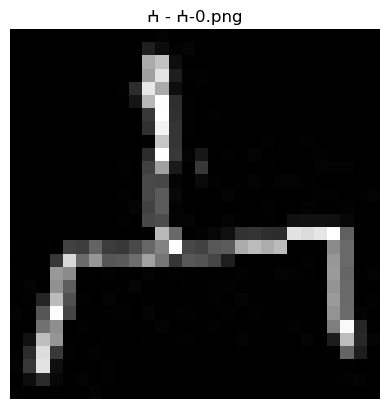

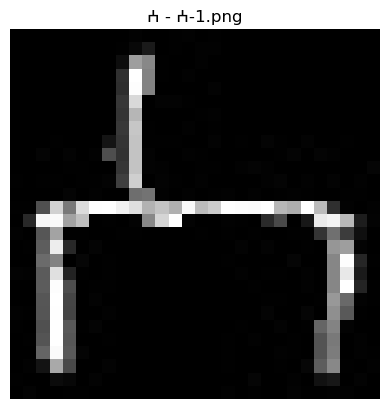

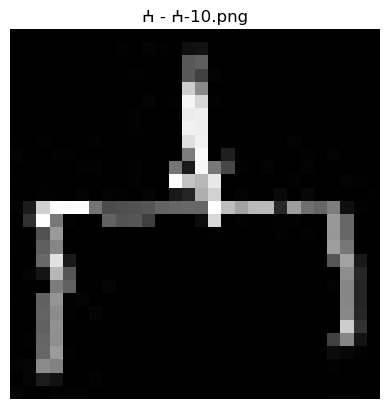

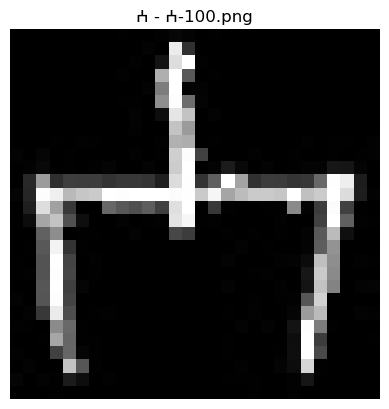

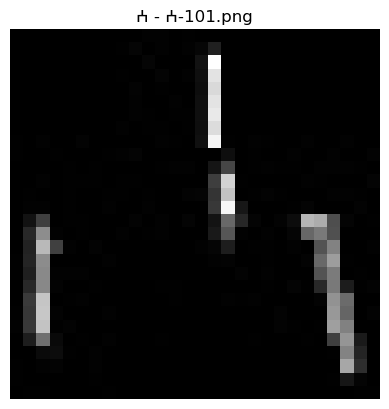

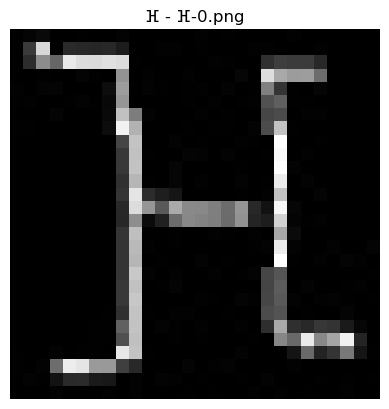

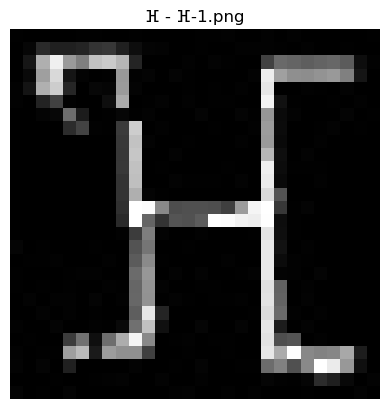

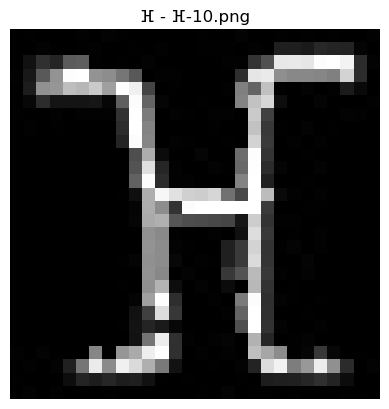

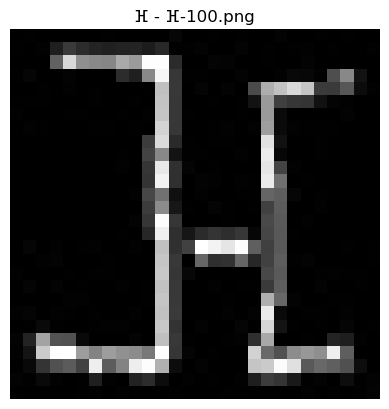

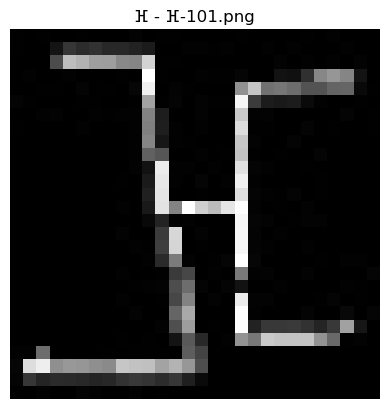

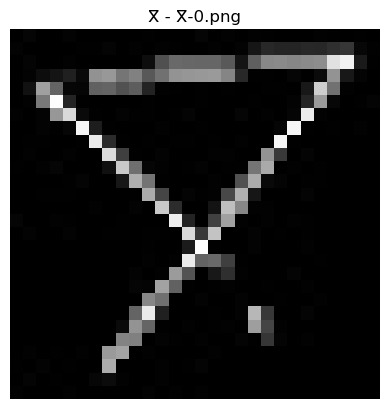

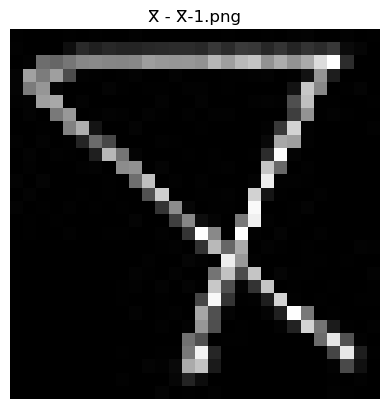

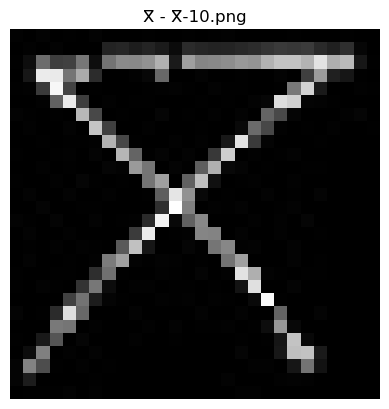

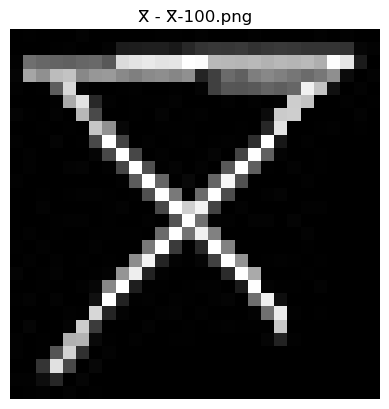

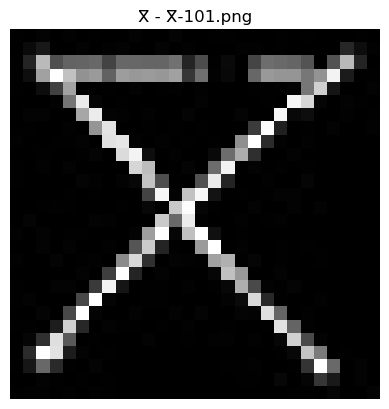

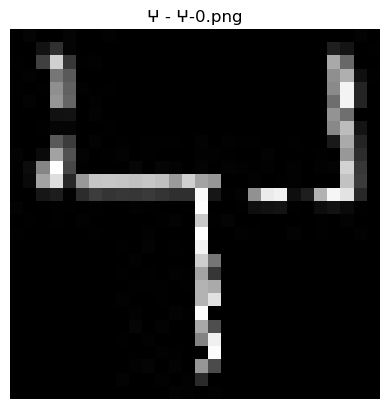

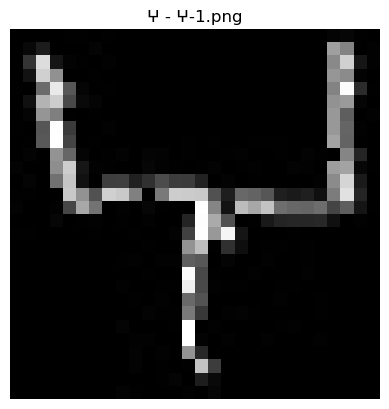

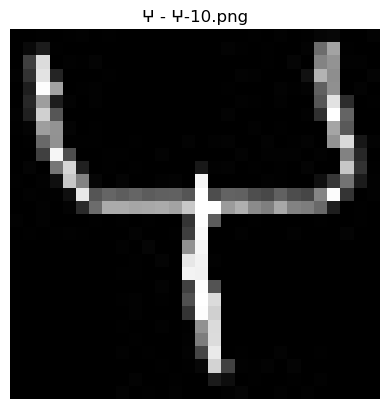

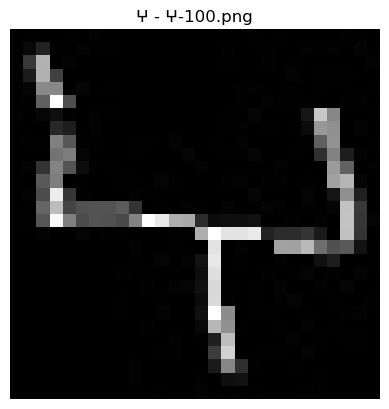

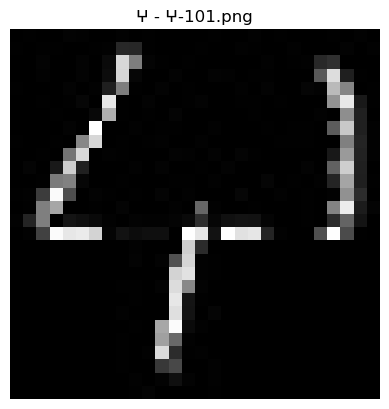

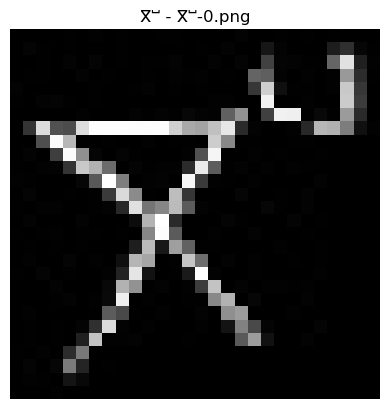

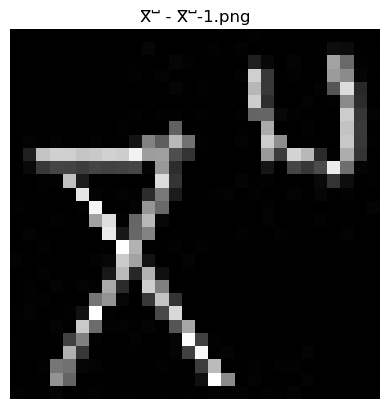

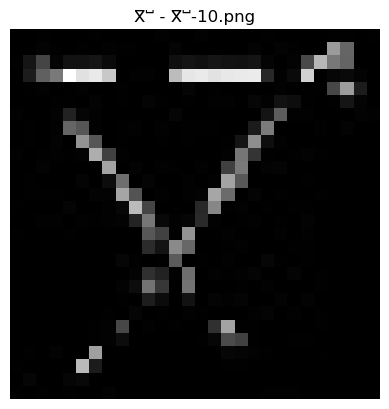

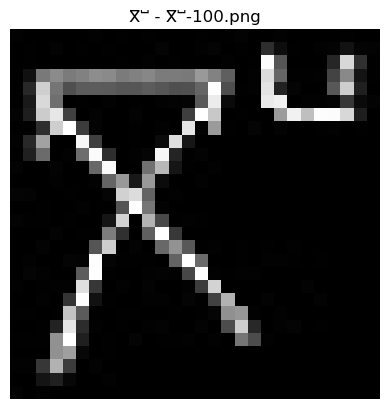

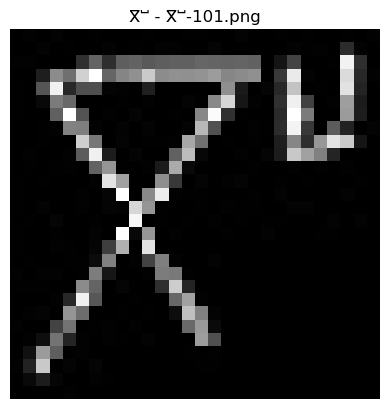

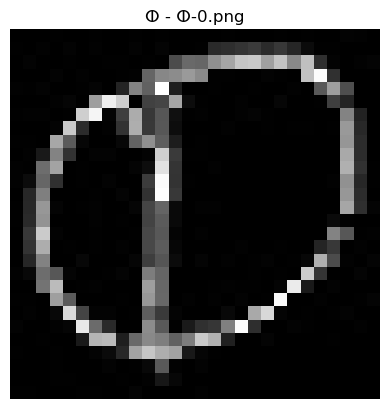

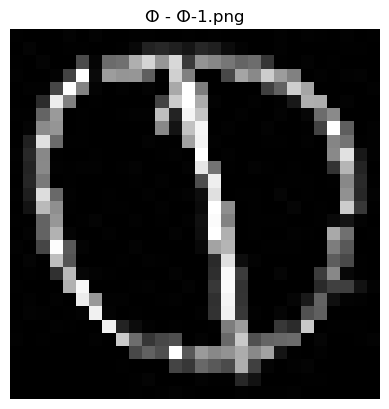

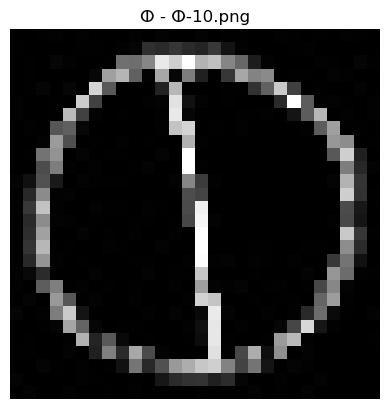

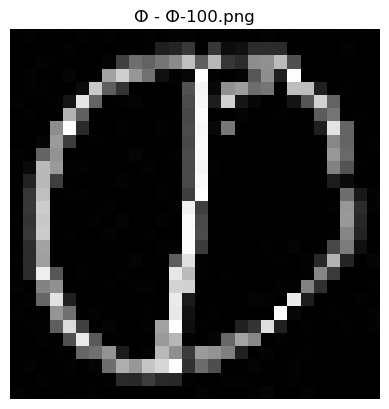

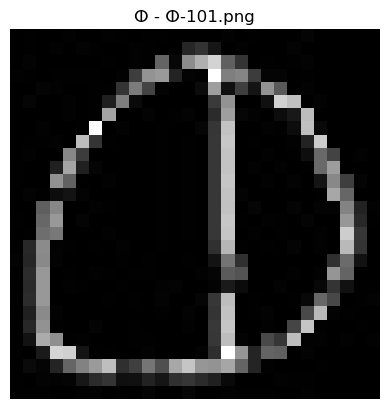

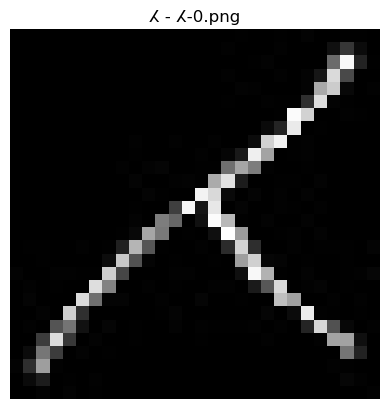

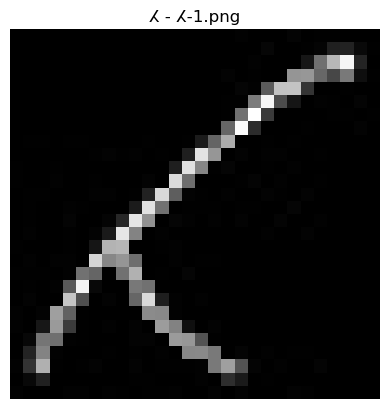

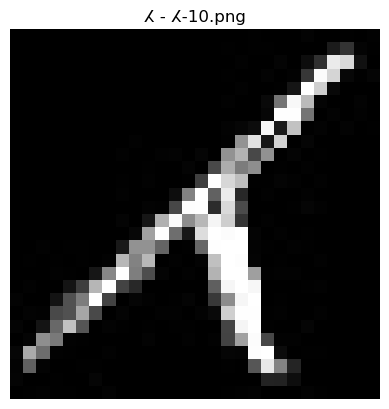

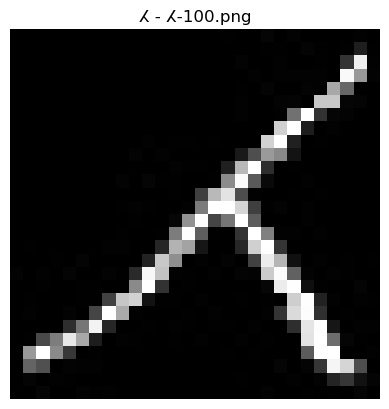

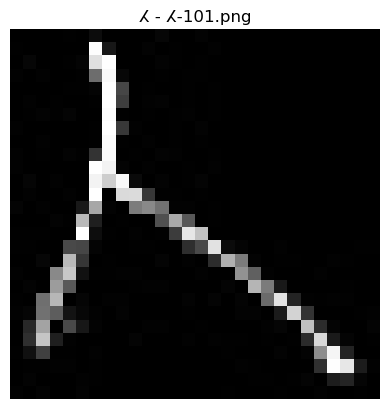

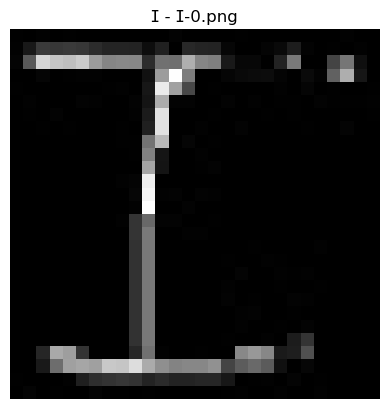

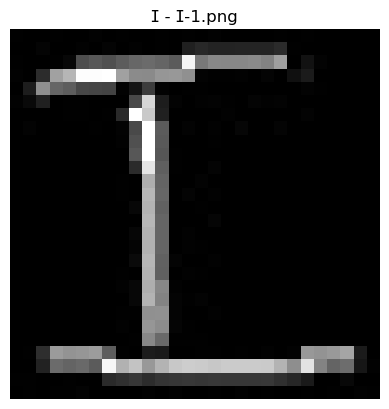

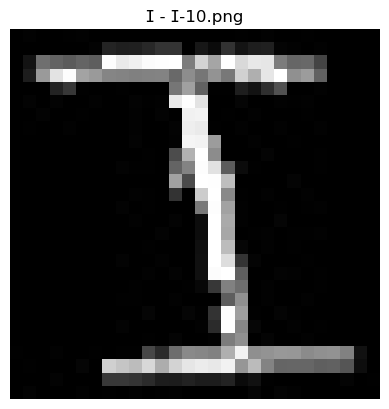

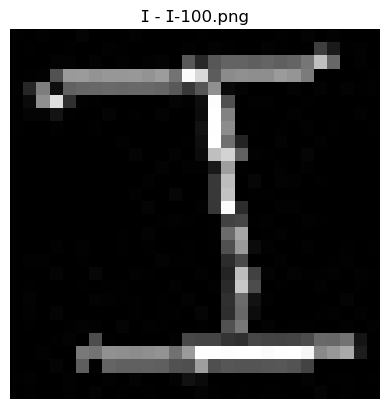

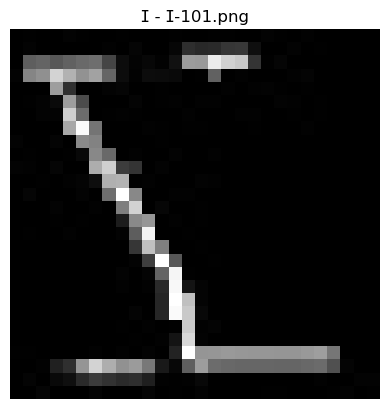

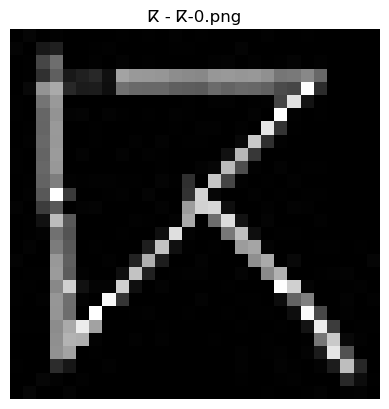

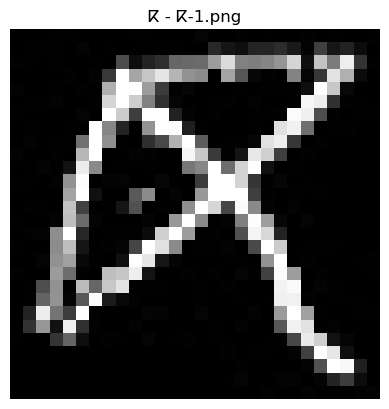

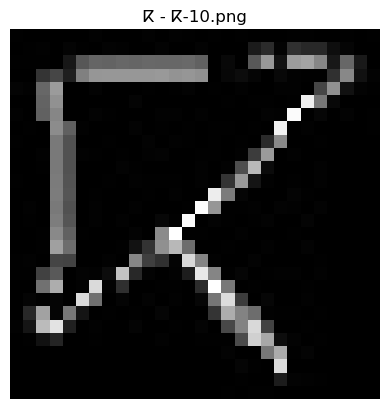

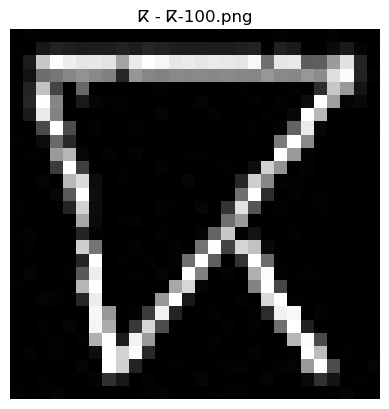

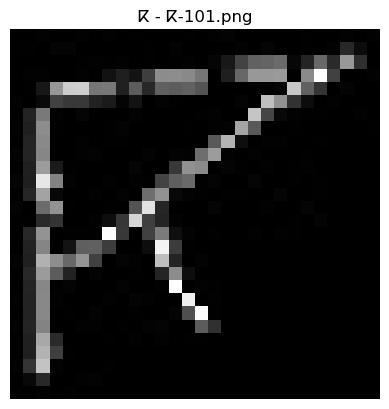

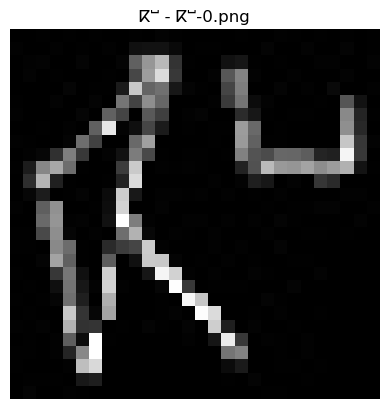

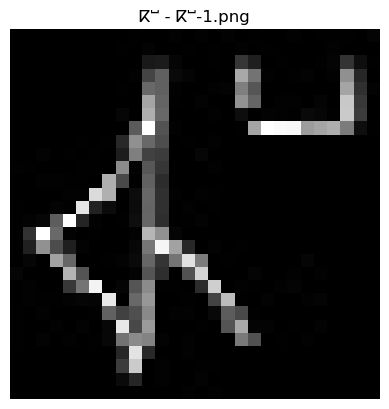

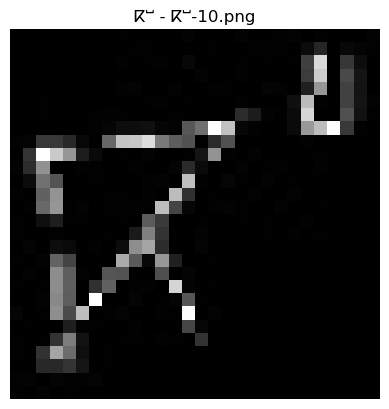

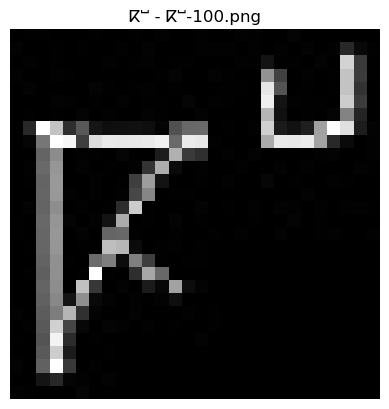

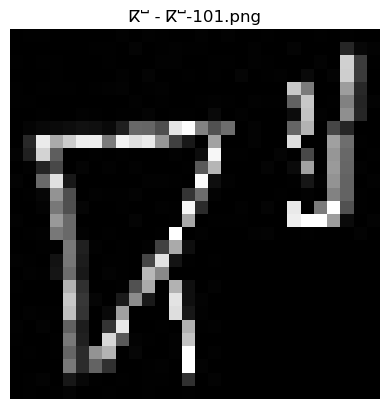

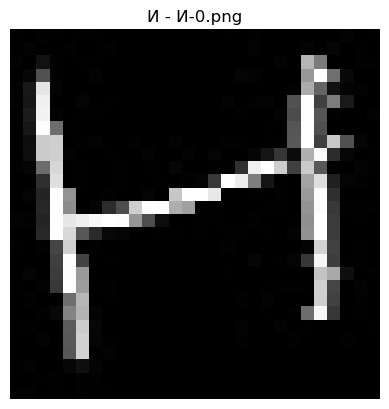

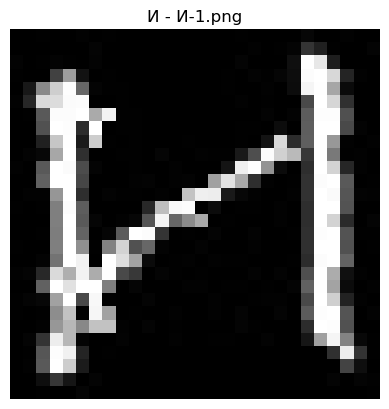

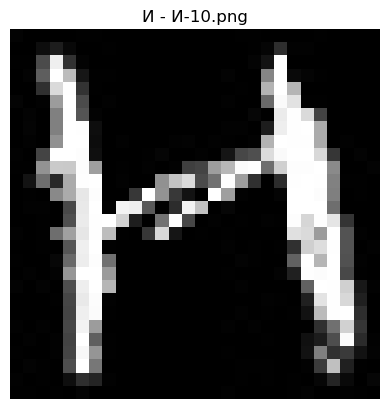

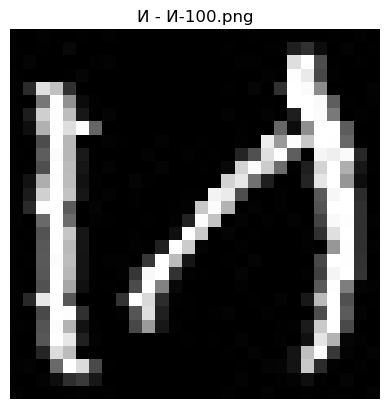

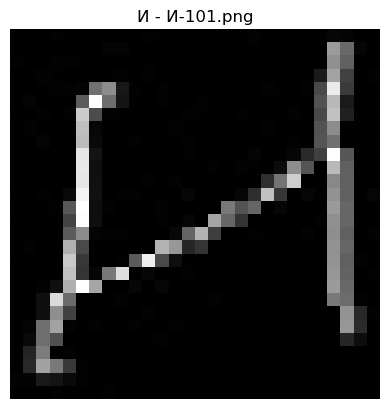

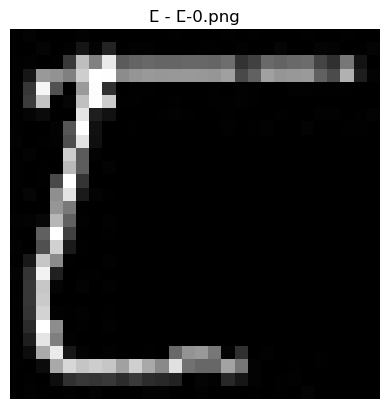

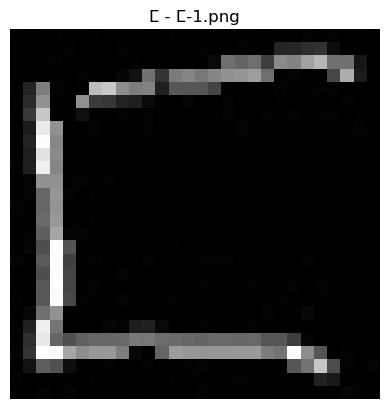

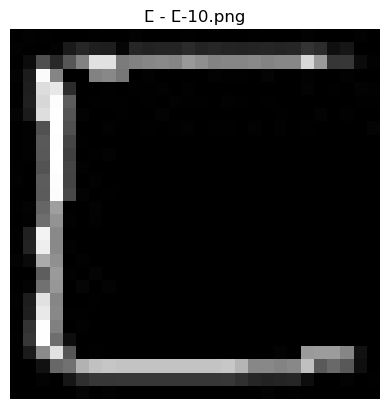

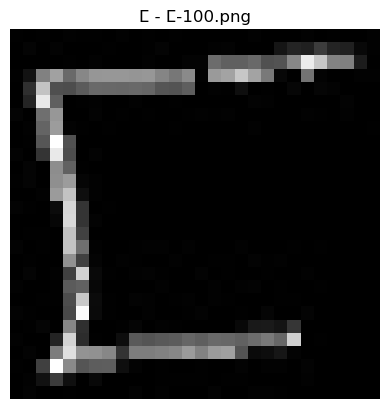

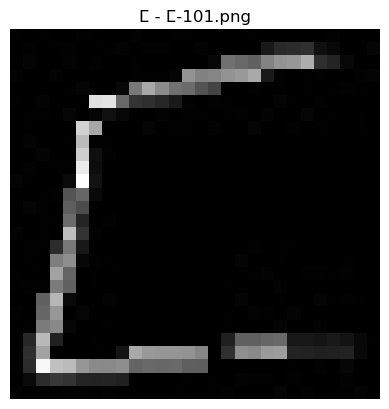

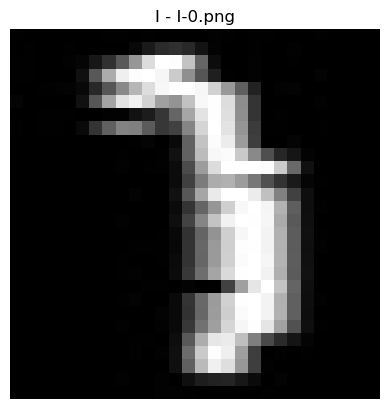

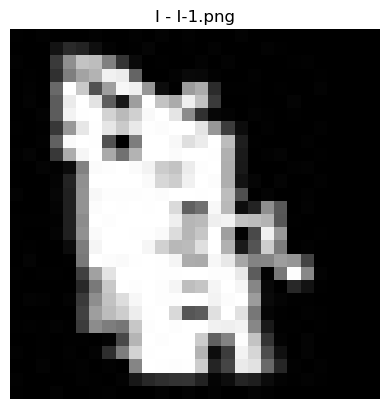

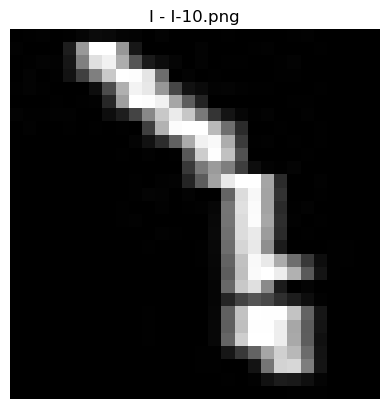

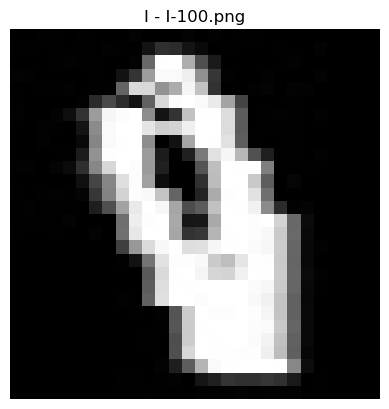

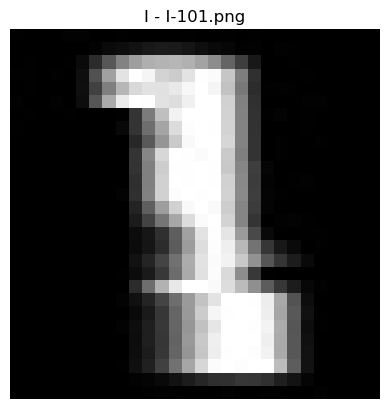

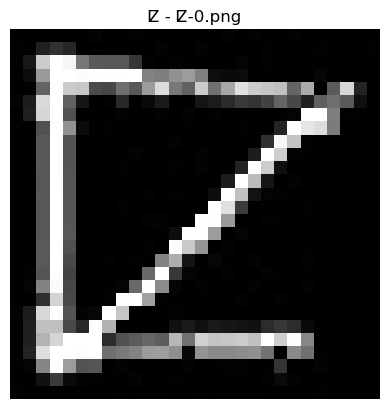

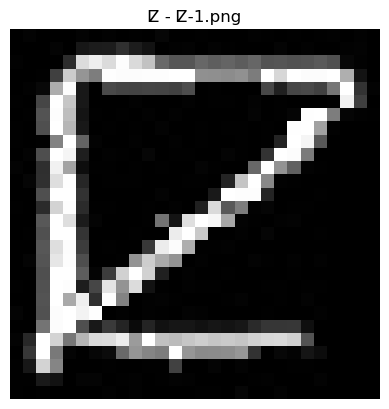

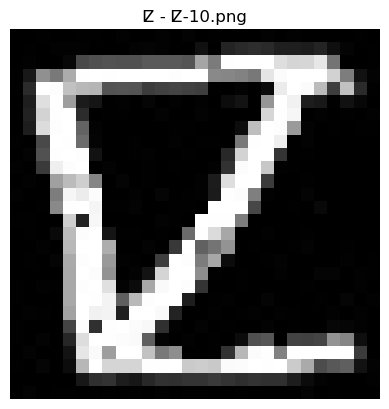

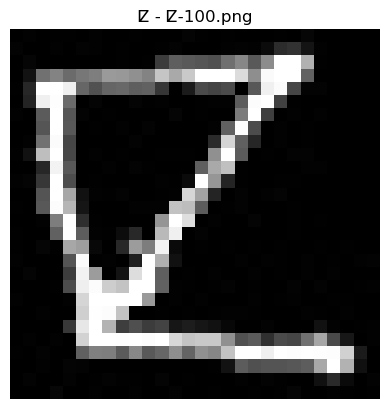

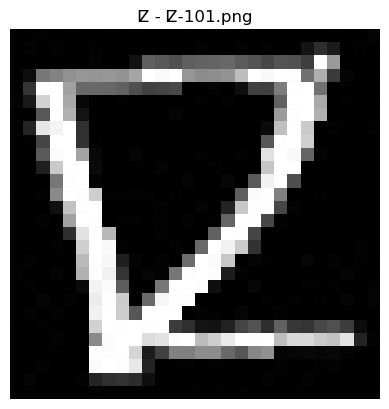

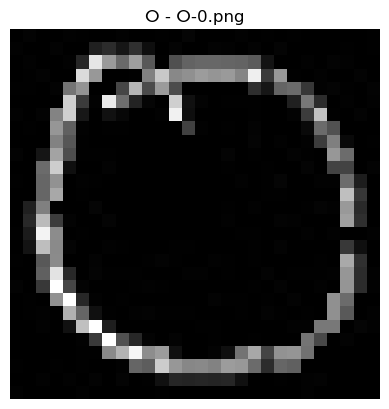

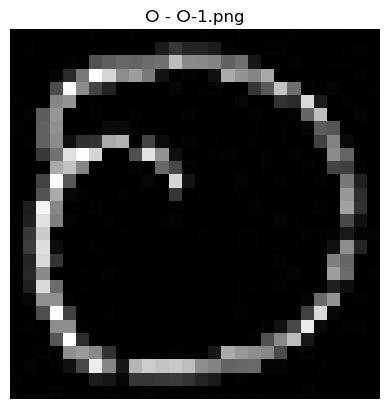

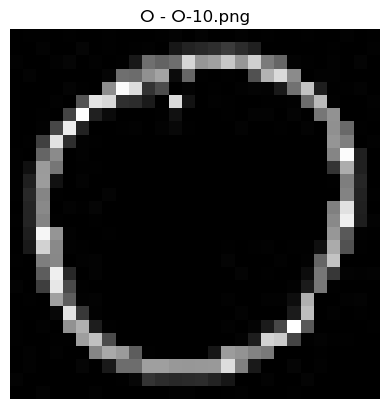

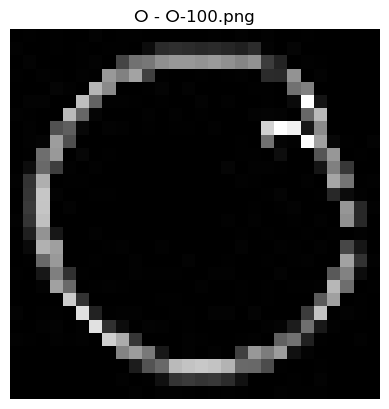

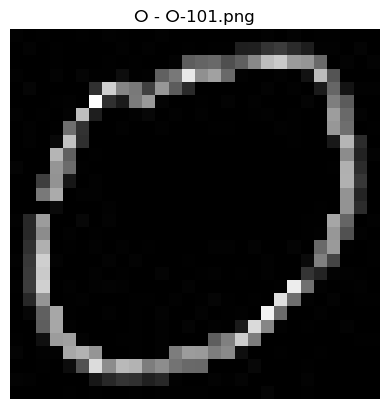

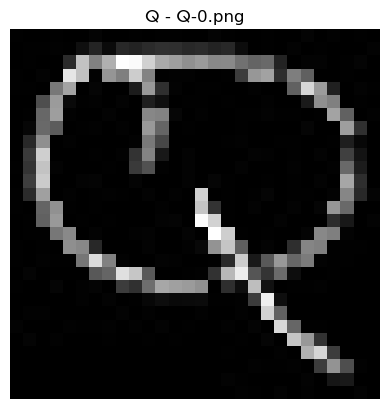

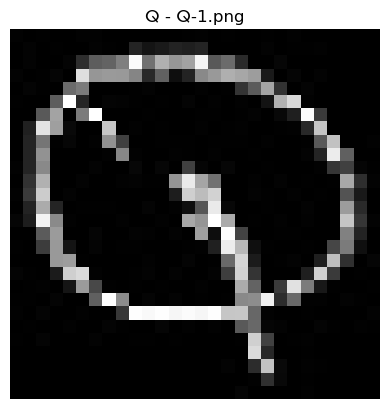

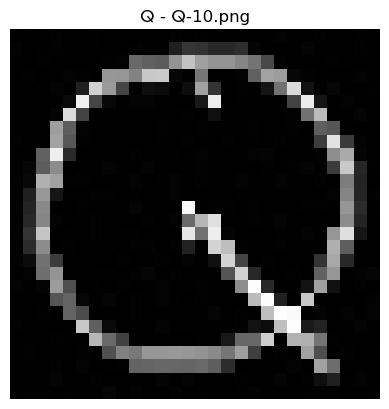

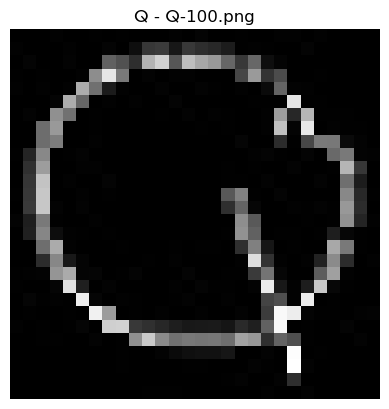

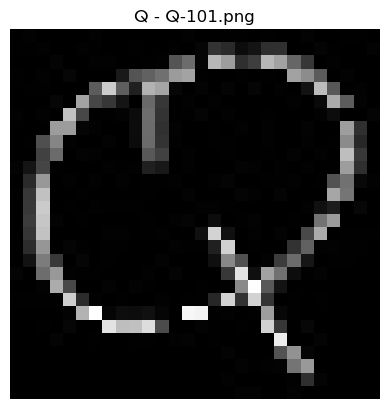

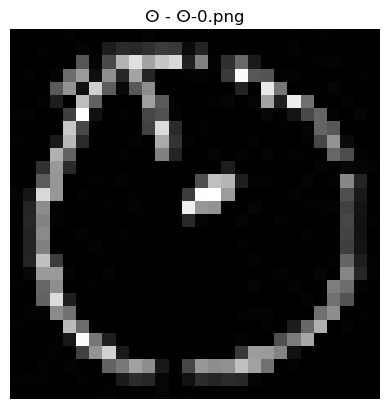

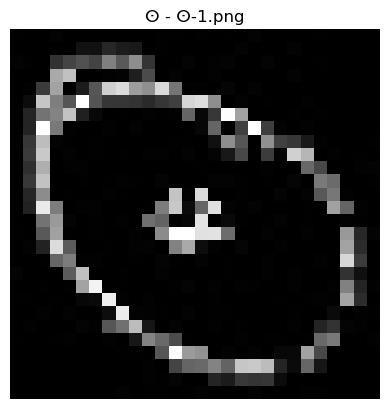

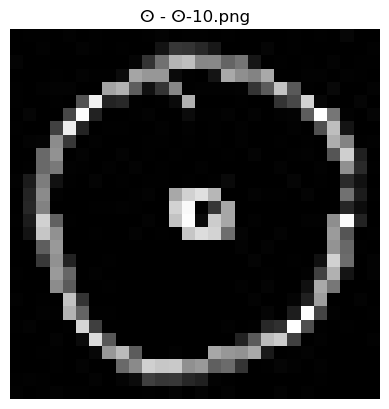

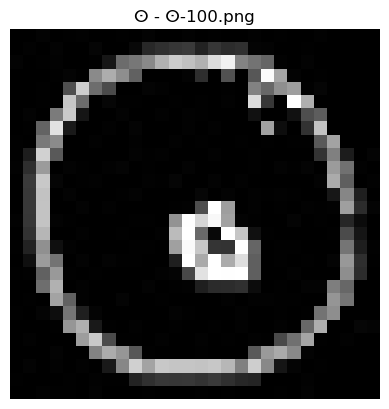

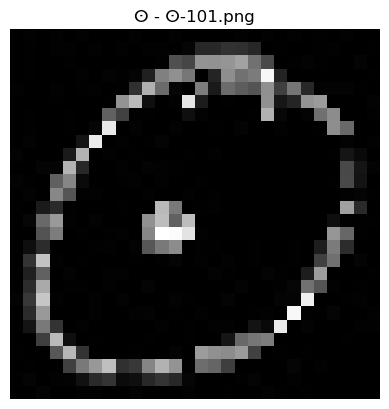

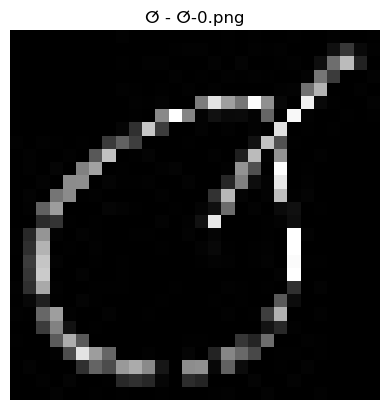

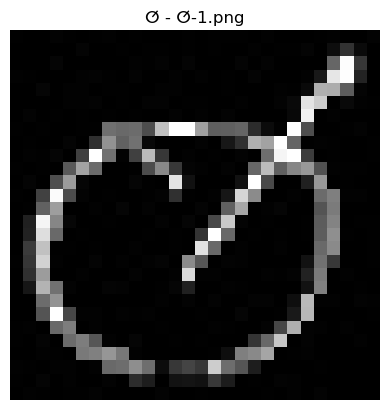

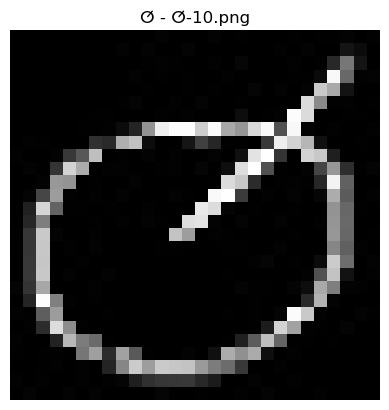

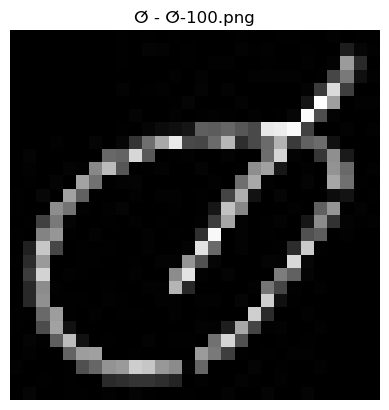

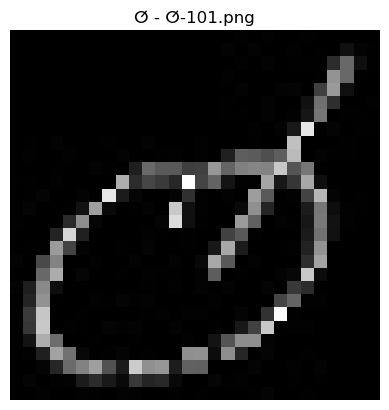

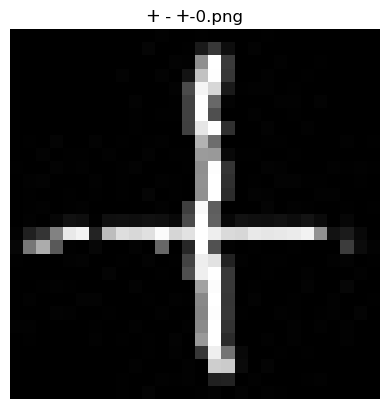

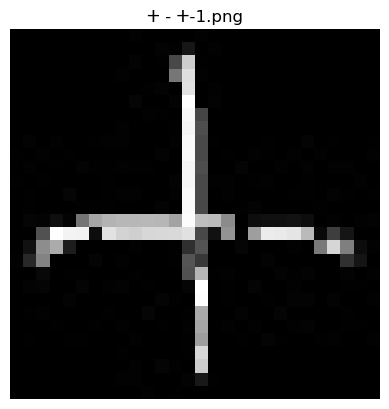

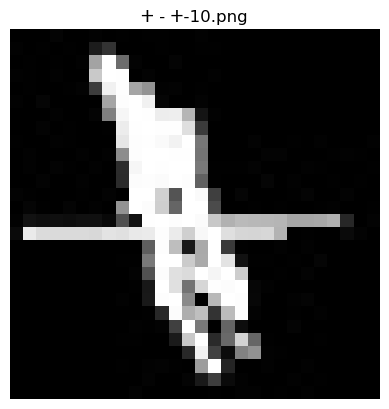

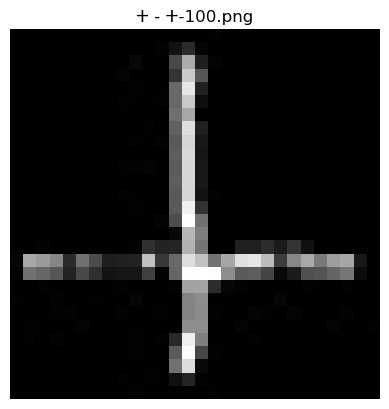

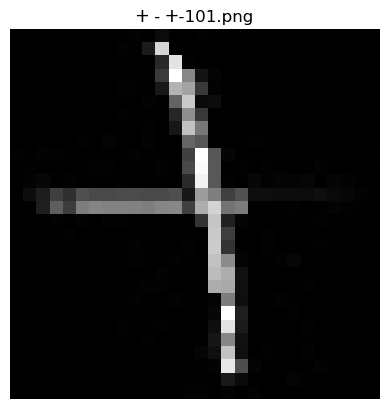

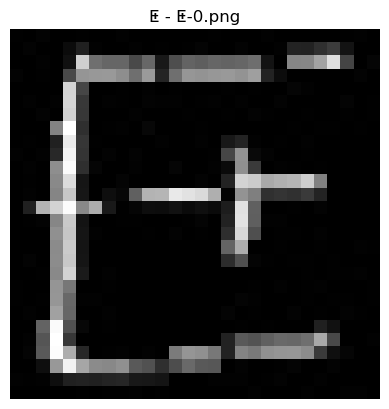

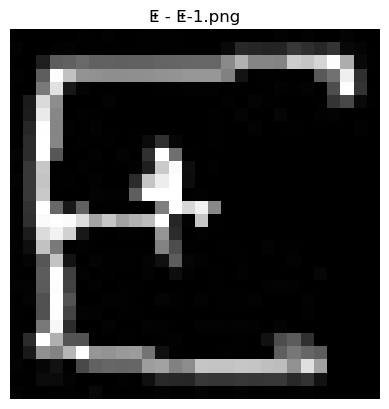

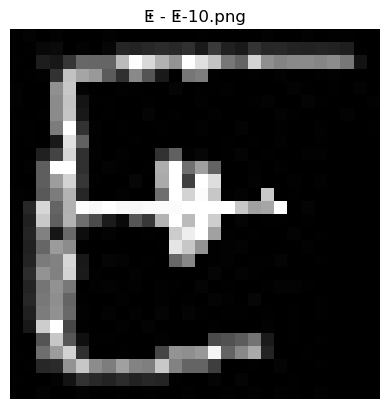

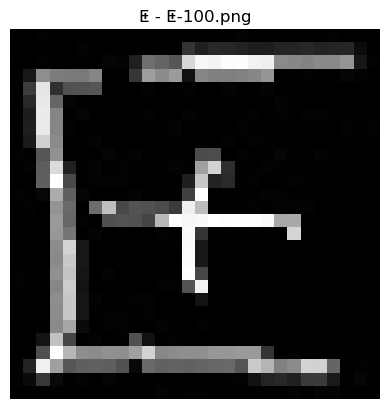

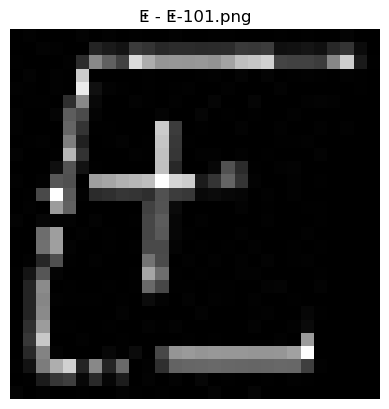

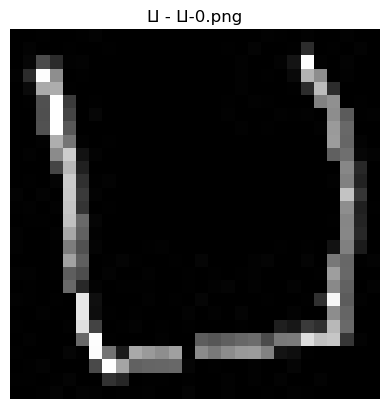

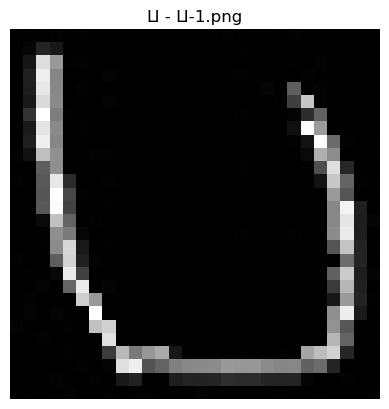

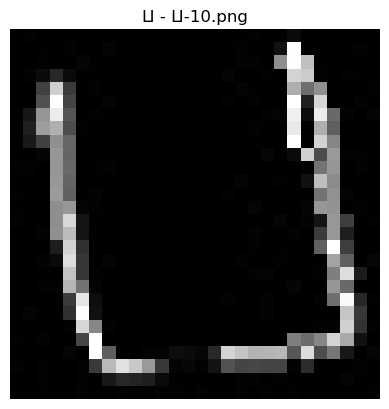

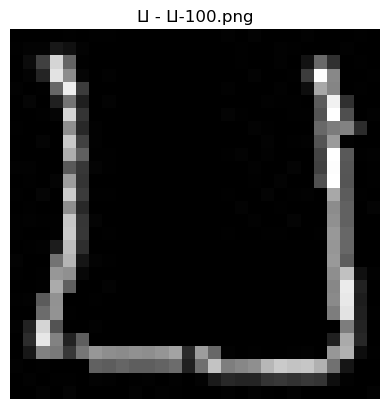

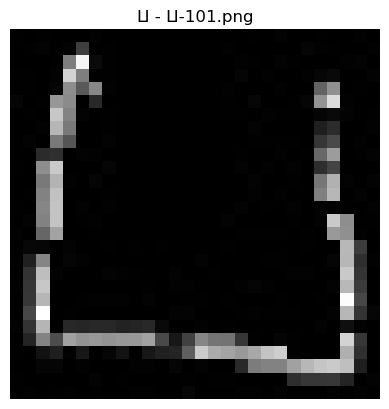

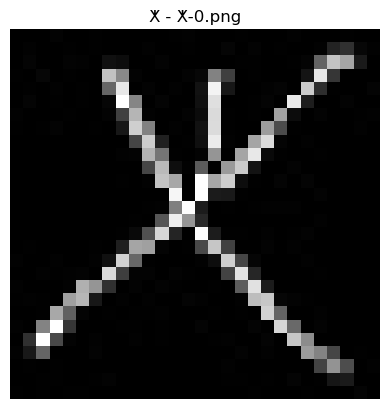

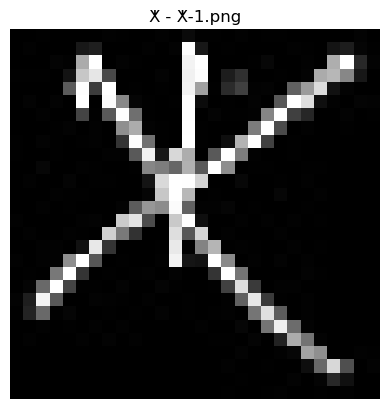

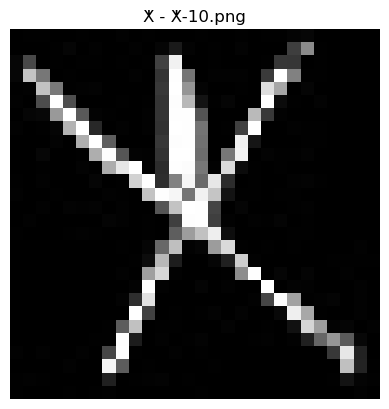

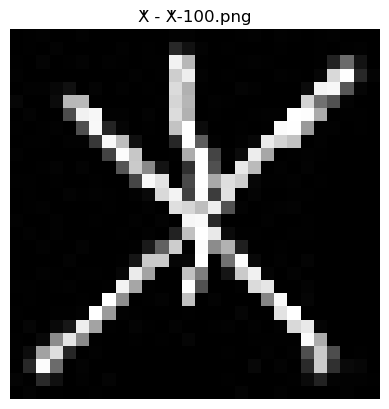

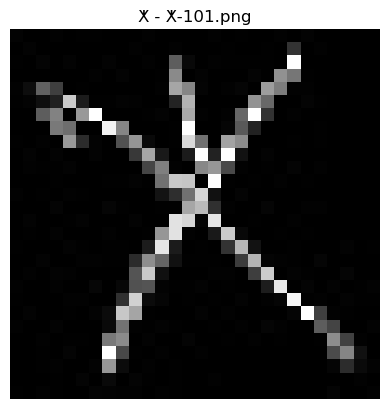

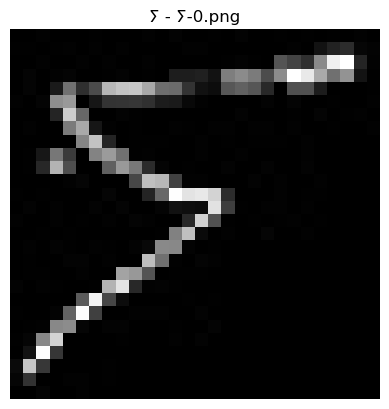

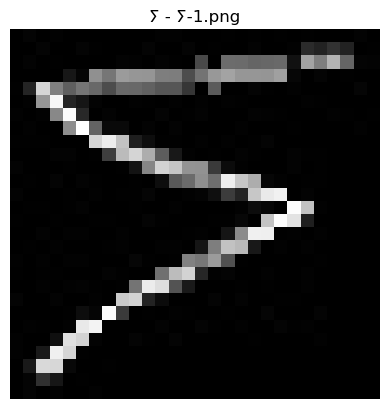

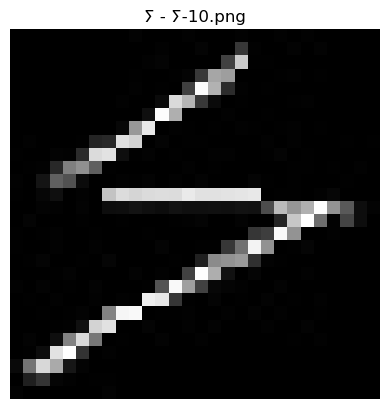

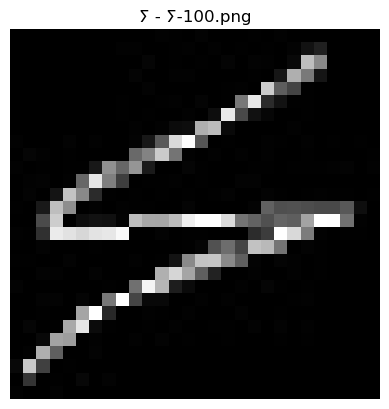

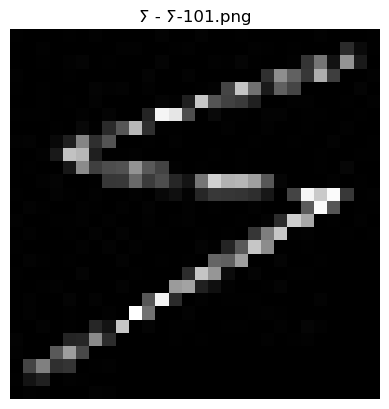

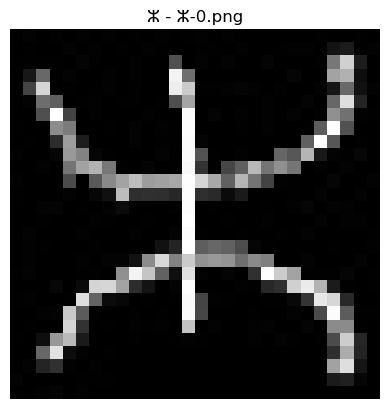

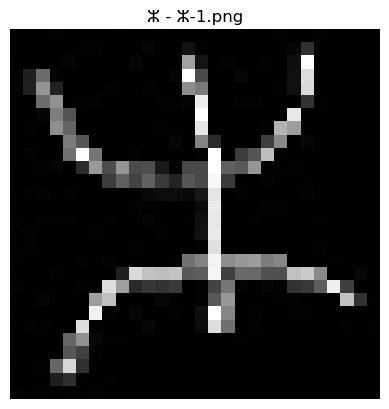

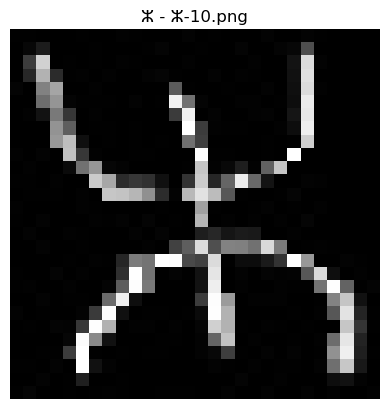

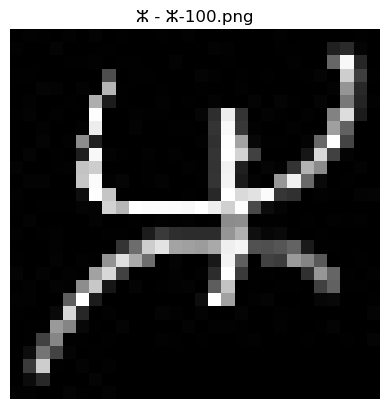

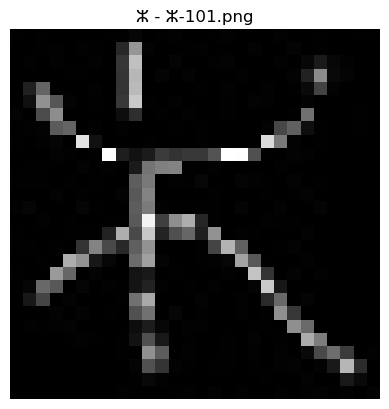

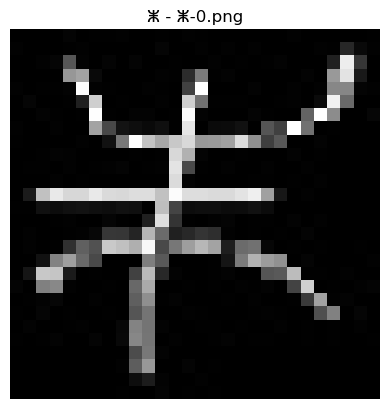

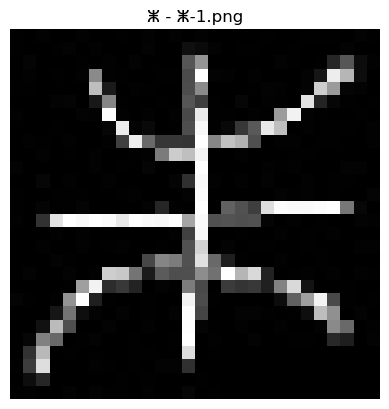

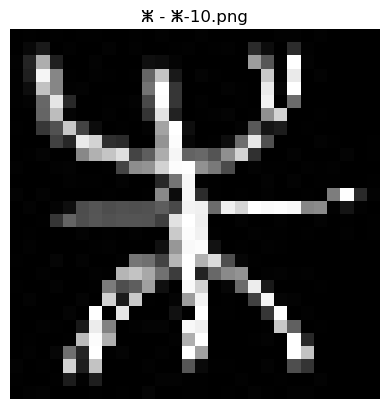

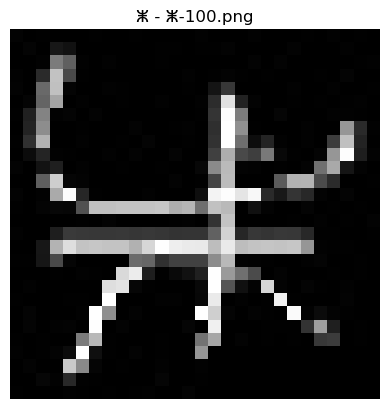

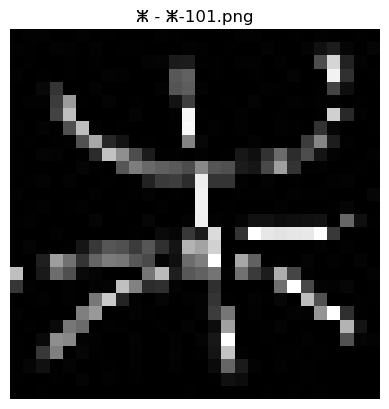

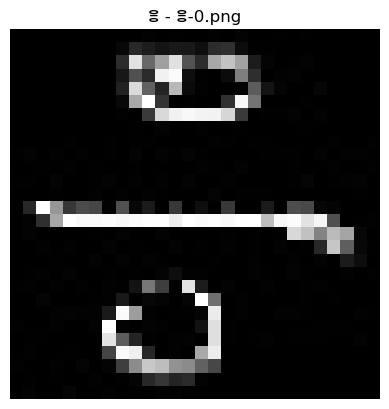

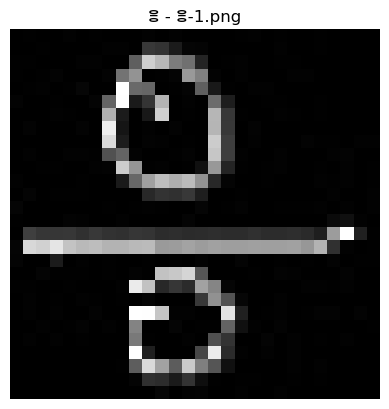

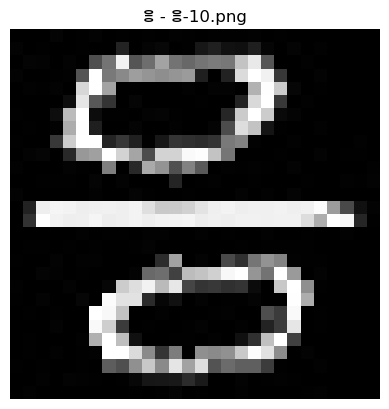

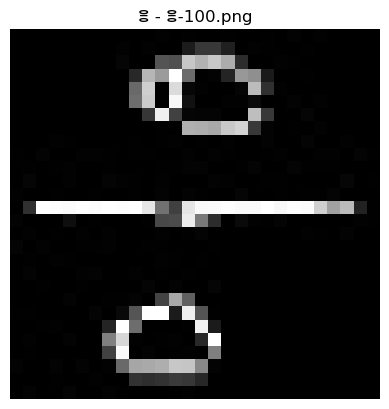

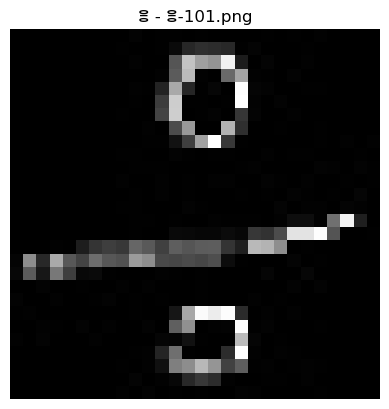

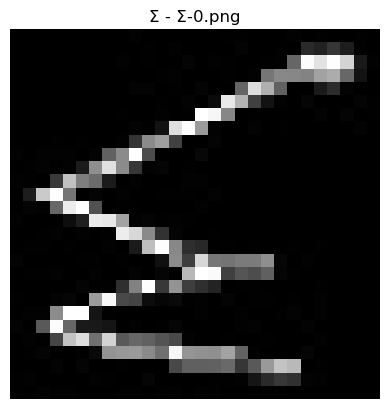

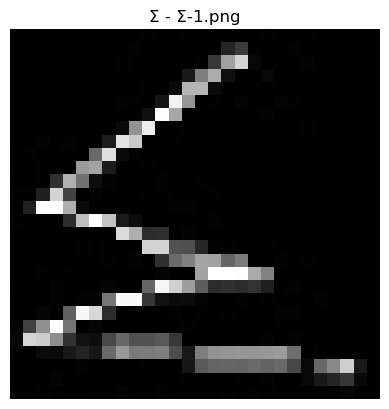

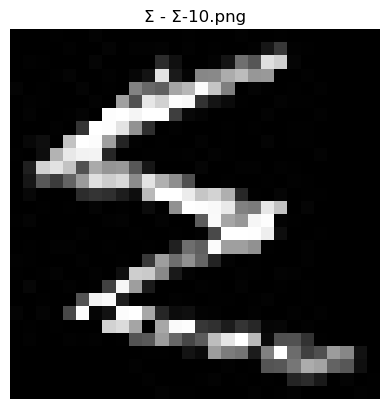

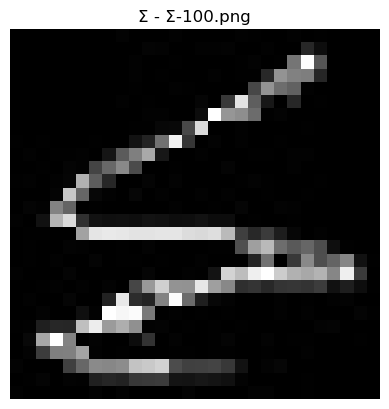

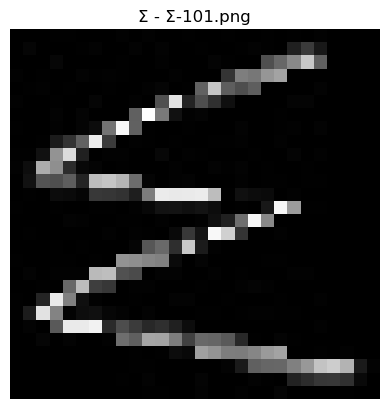

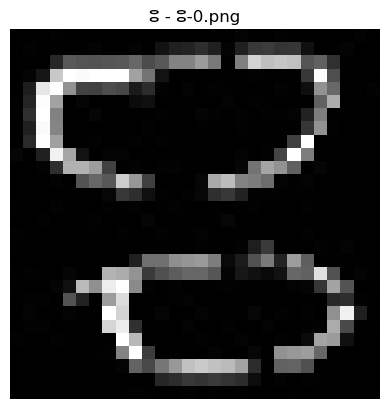

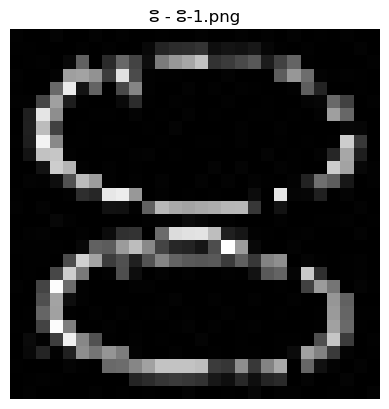

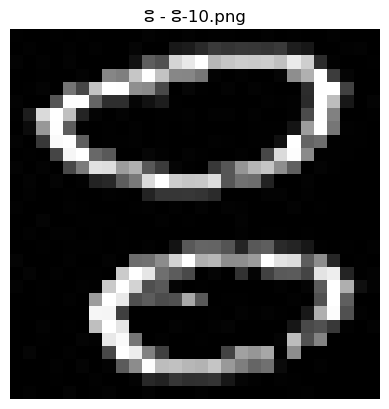

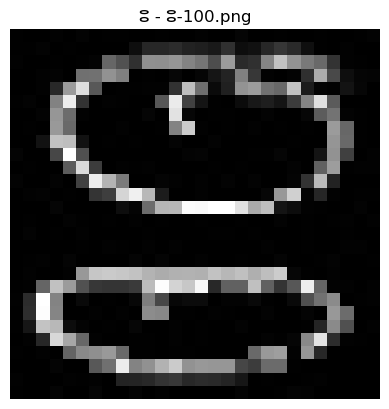

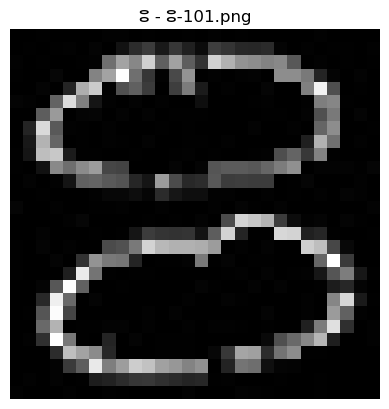

In [58]:
Alphabet_list = ["ⴰ","ⴱ","ⵛ","ⴷ","ⴹ","ⵄ","ⴼ","ⴳ","ⵖ","ⴳⵯ","ⵀ","ⵃ","ⵊ","ⴽ","ⴽⵯ","ⵍ","ⵎ","ⵏ","ⵇ","ⵔ","ⵕ","ⵙ","ⵚ","ⵜ","ⵟ",
                "ⵡ","ⵅ","ⵢ","ⵣ","ⵥ","ⴻ","ⵉ","ⵓ"]

# Looping through each alphabet and displaying images
for alphabet in Alphabet_list:
    folder_path = os.path.join(image_folder_path, alphabet)
    images = os.listdir(folder_path)
    for img_name in images[:5]:  
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"{alphabet} - {img_name}")
        plt.axis('off')
        plt.show()


In [59]:
# Defining paths
csv_file_path = r"C:\Users\bouad\OneDrive\Bureau\Amazigh NLP\MNIST-BERBER\Latin-version\Latin-version.csv"  # Adjust the path as necessary

image_folder_path = "imgL"

Alphabet_list = ["A","Ԑ","B","C","Č","D","Ḍ","E","F","G","Ǧ","H","Ḥ","I","J","K","L","M","N","Q","Γ","R","Ṛ","S","Ṣ","T","Ṭ",
                 "TT","U","W","X","Y","Z","Ẓ"]

In [60]:
# Creating directories for each alphabet
for alphabet in Alphabet_list:
    path = os.path.join(image_folder_path, alphabet)
    if not os.path.exists(path):
        os.makedirs(path)

In [61]:
last_digit_Name = None

with open(csv_file_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in reader:
        digit_Name = row.pop(0)
        image_array = np.asarray(row, dtype=np.uint8)  # Ensure the array is of type uint8
        image_array = image_array.reshape(28, 28)  # Reshape to 28x28
        new_image = Image.fromarray(image_array)

        if last_digit_Name != Alphabet_list[int(digit_Name)]:
            last_digit_Name = Alphabet_list[int(digit_Name)]
            count = 0
            print("")
            print("Processing Alphabet - " + last_digit_Name)

        image_path = os.path.join(image_folder_path, last_digit_Name, f"{last_digit_Name}-{count}.png")
        new_image.save(image_path)
        count += 1

        if count % 1000 == 0:
            print("Images processed: " + str(count))

print("Processing complete.")


Processing Alphabet - A
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000

Processing Alphabet - Ԑ
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000

Processing Alphabet - B
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000

Processing Alphabet - C
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000

Processing Alphabet - Č
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11

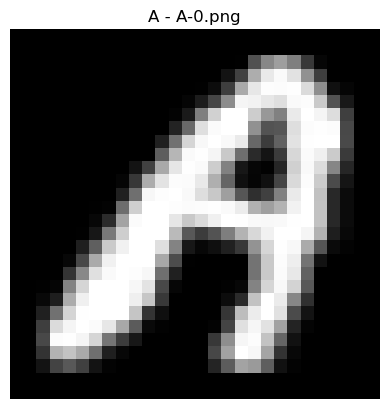

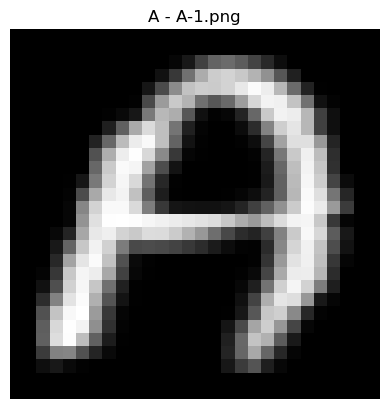

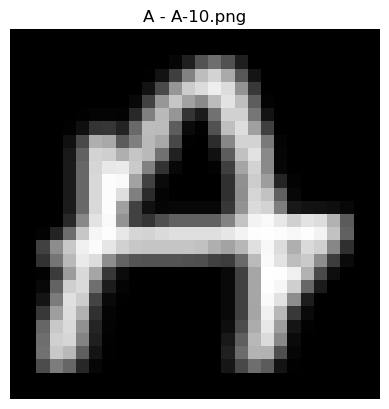

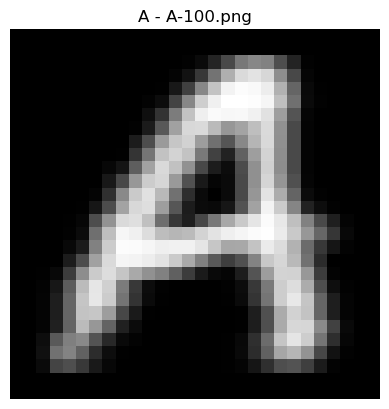

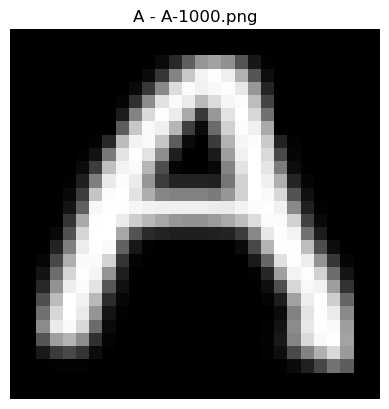

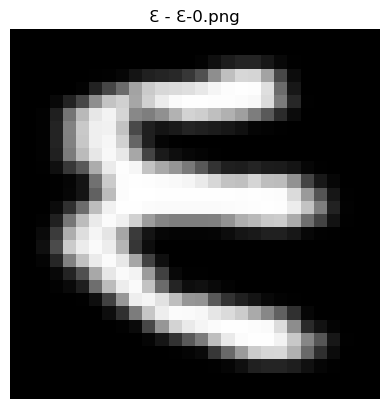

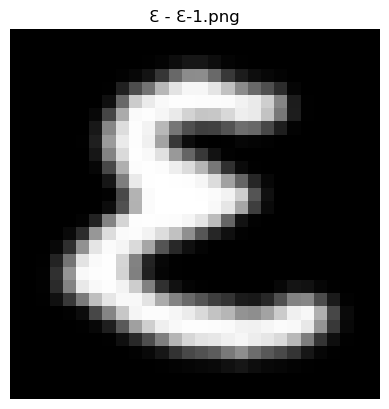

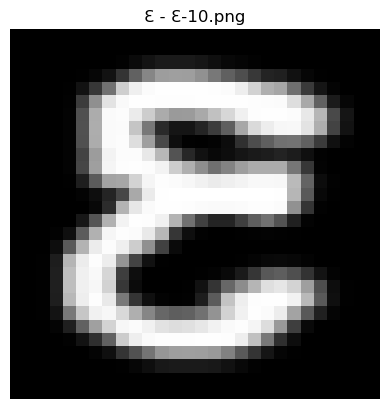

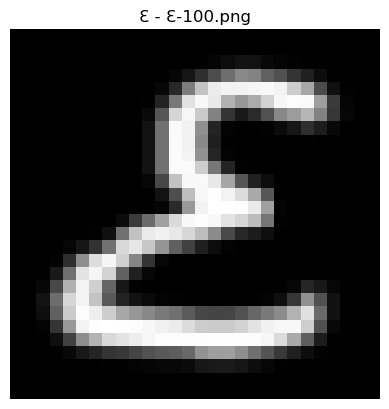

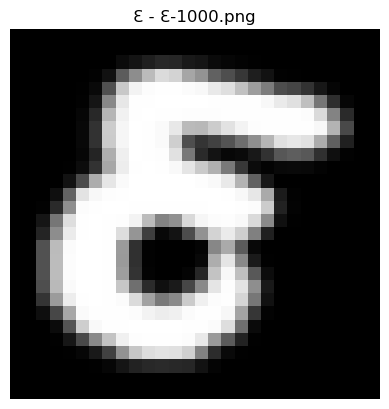

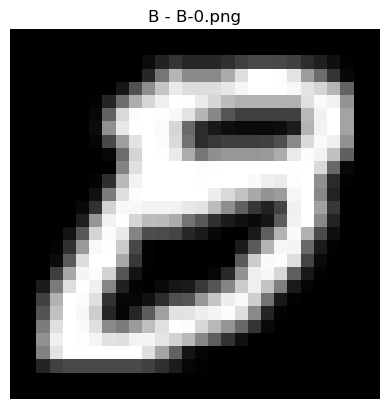

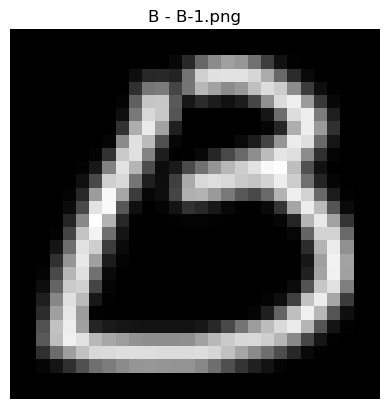

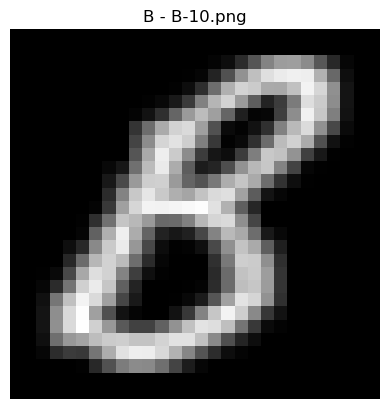

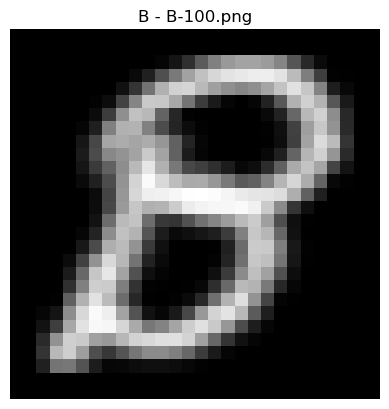

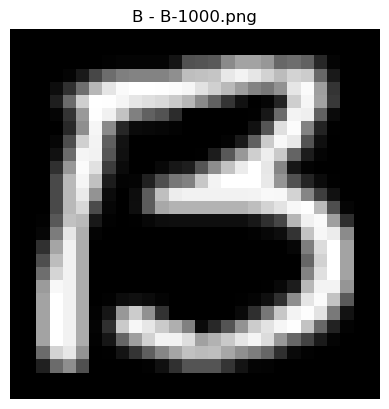

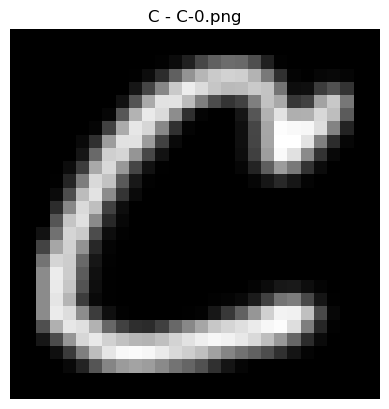

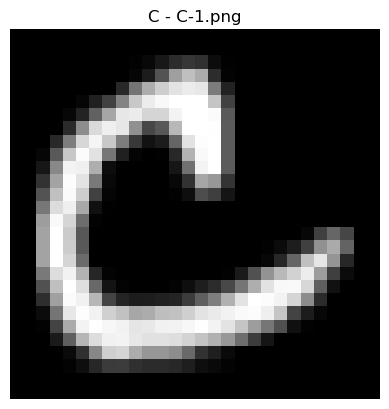

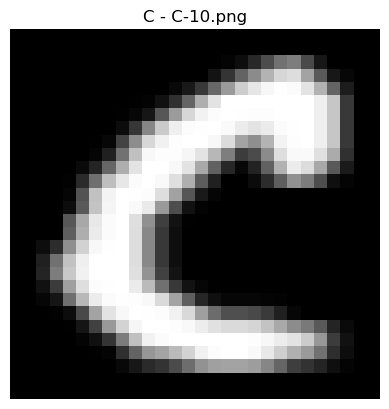

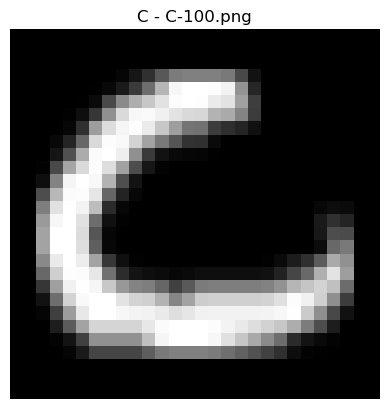

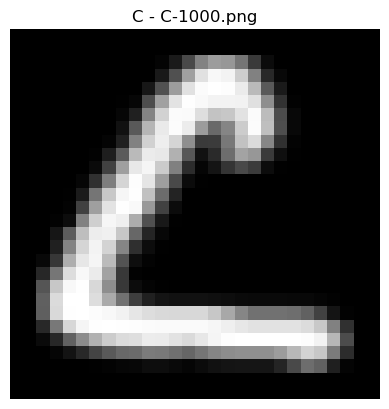

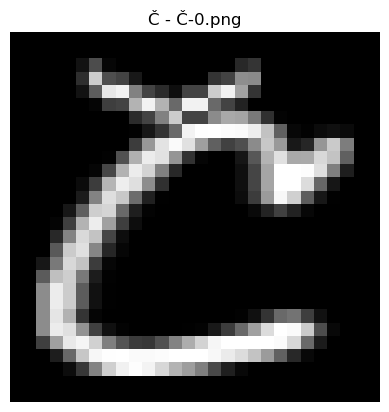

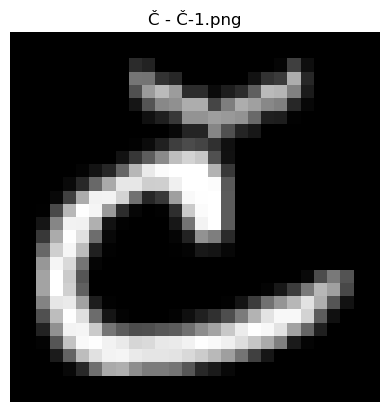

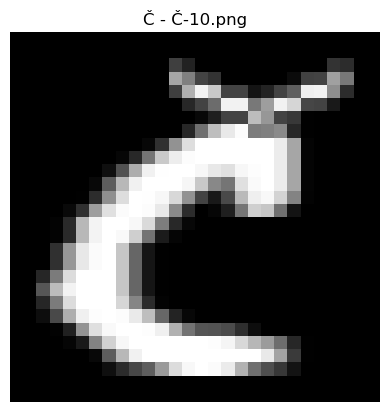

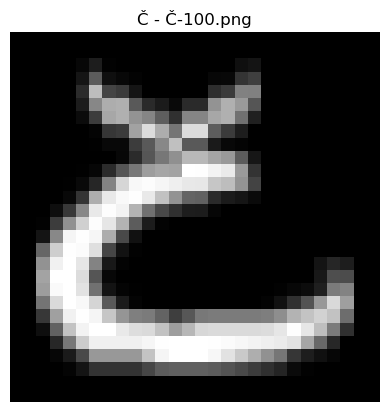

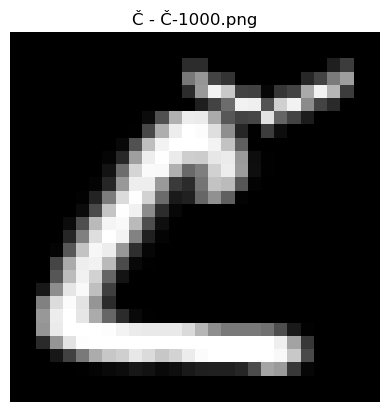

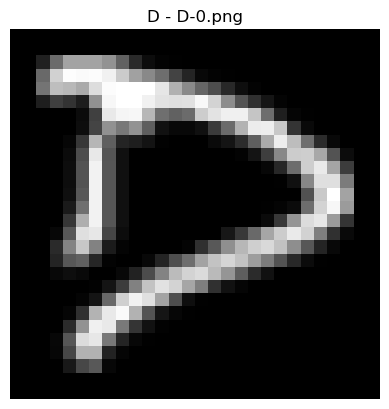

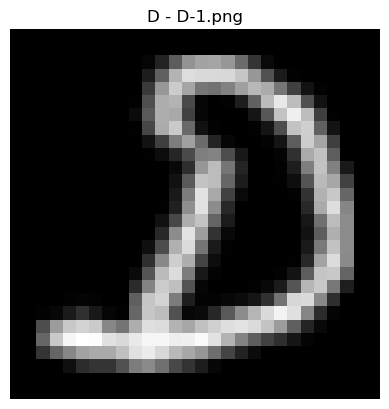

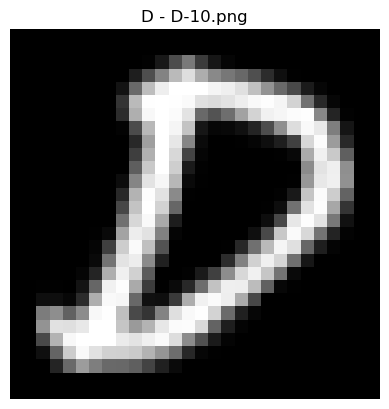

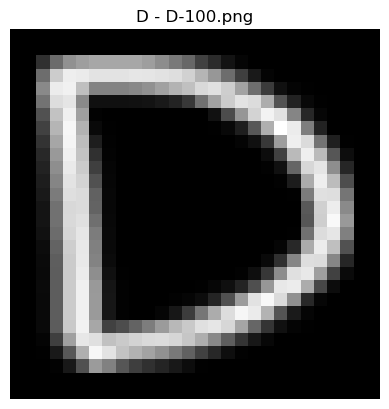

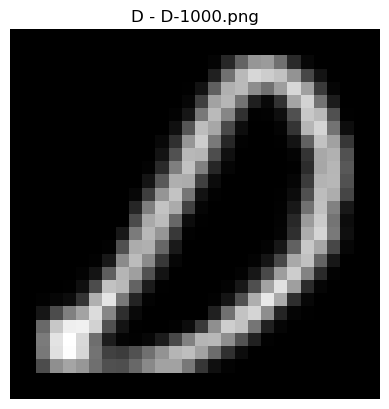

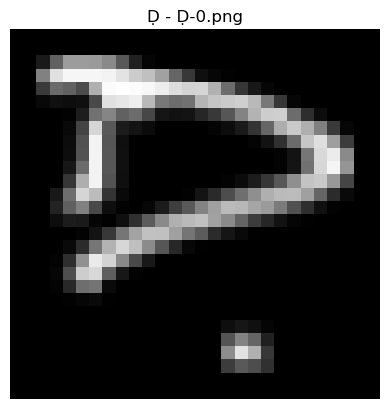

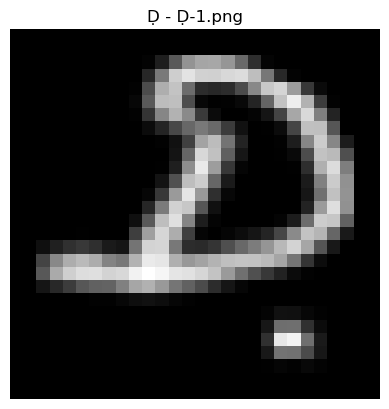

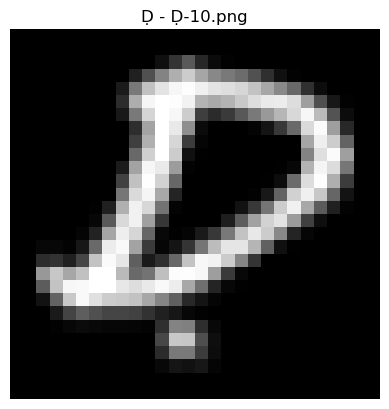

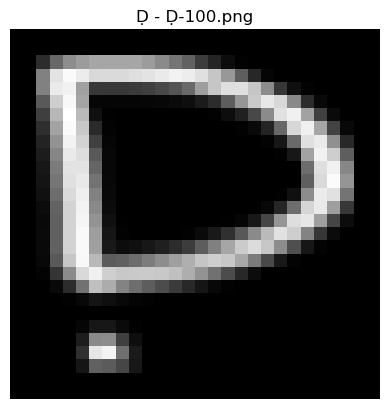

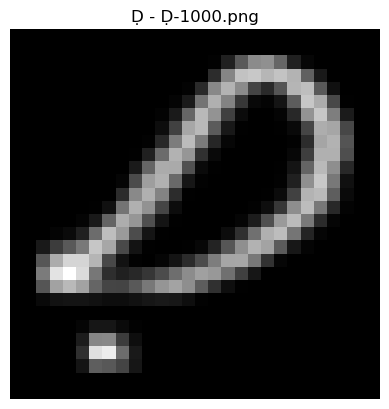

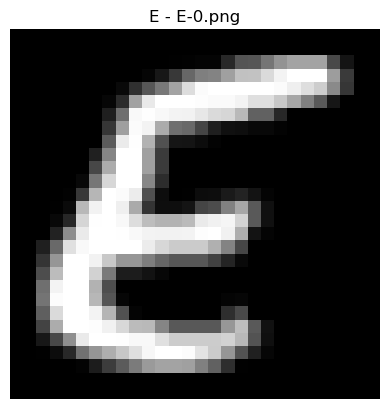

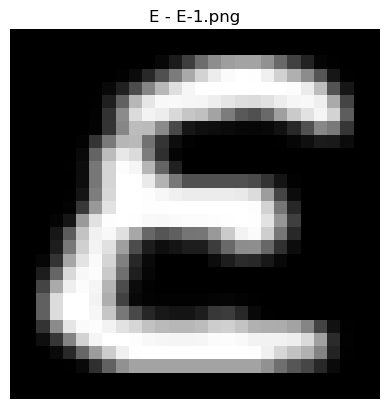

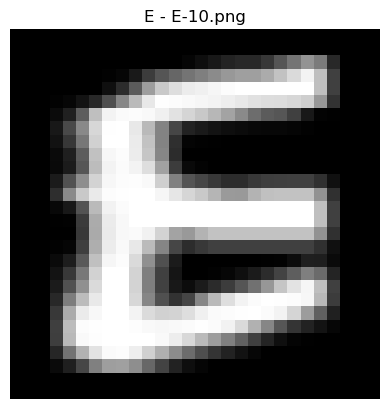

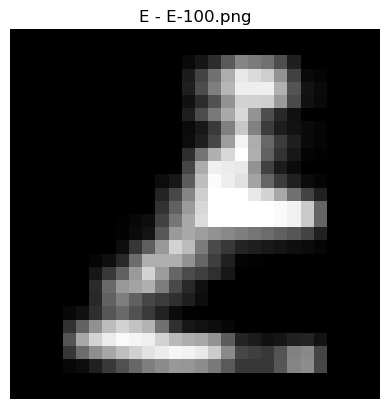

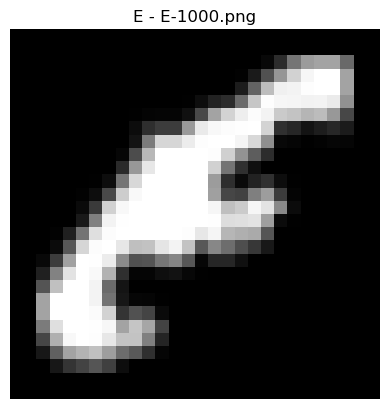

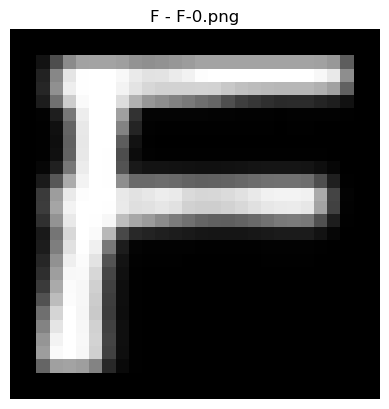

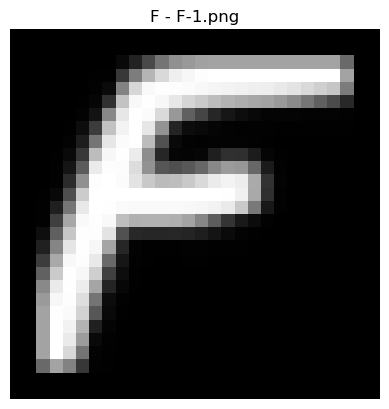

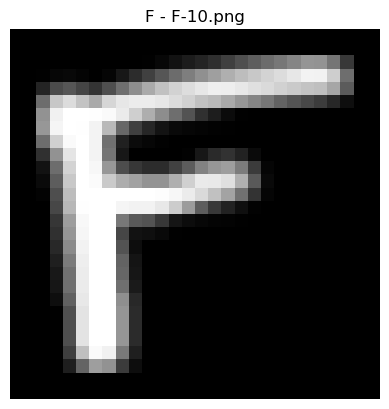

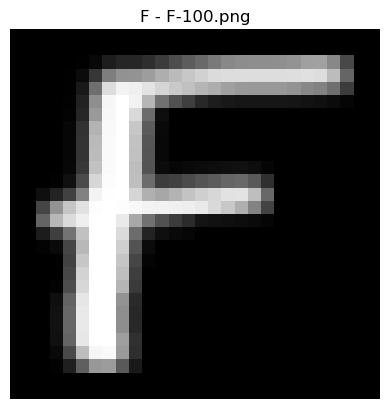

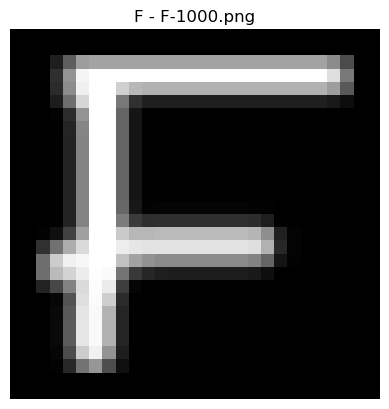

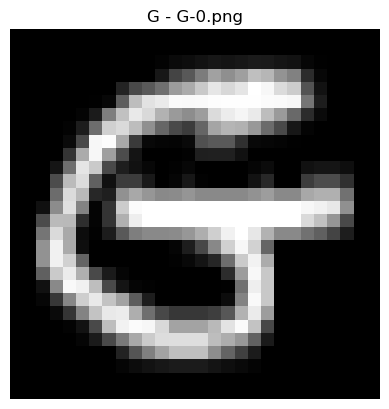

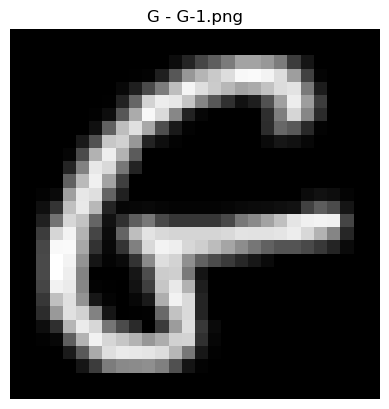

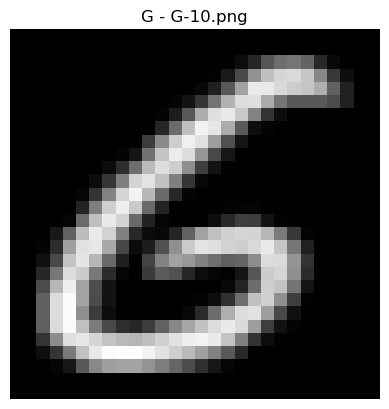

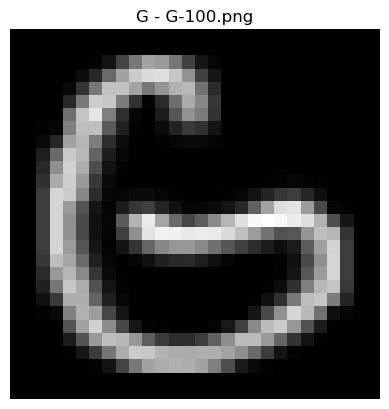

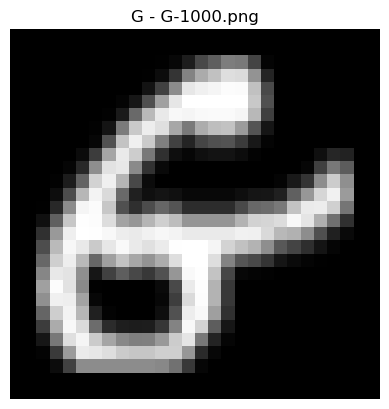

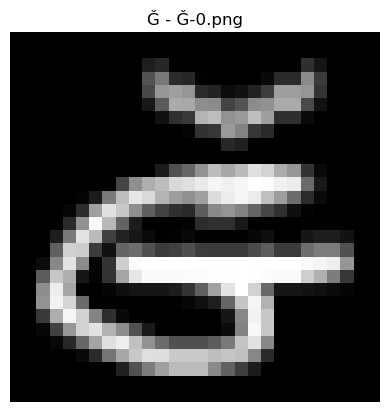

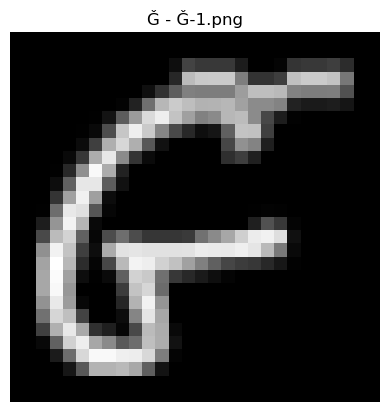

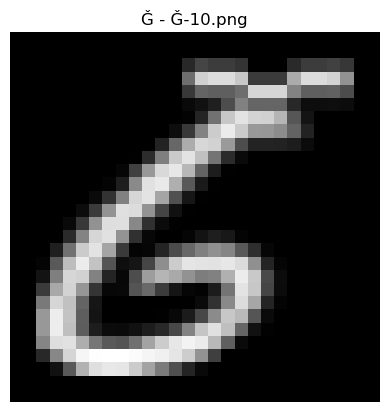

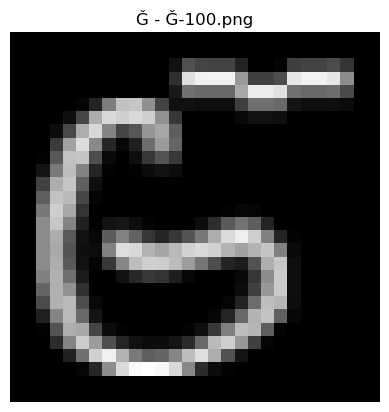

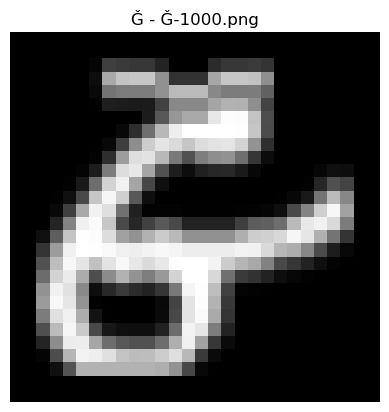

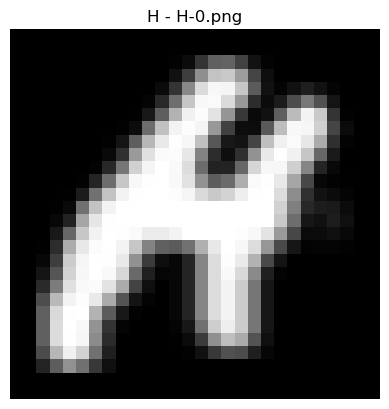

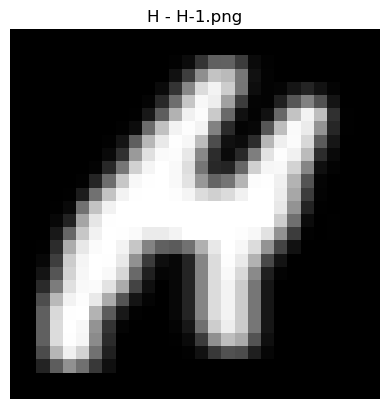

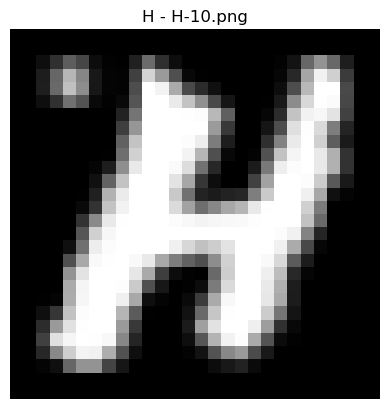

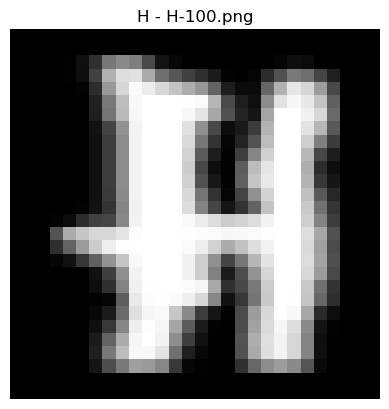

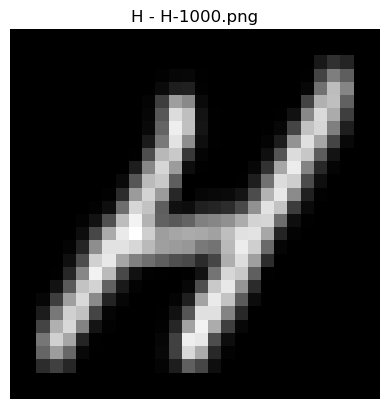

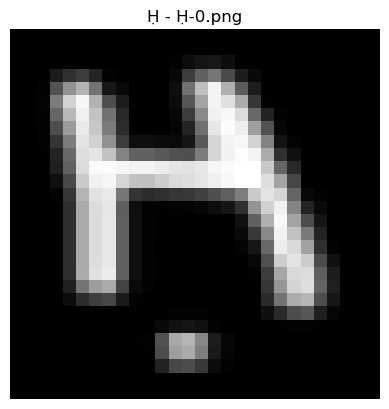

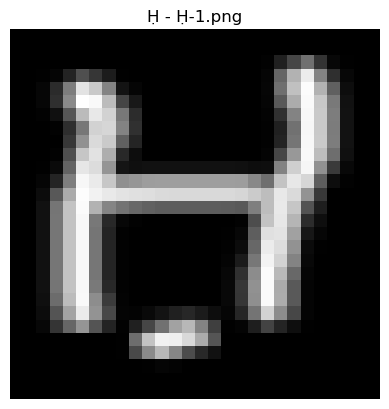

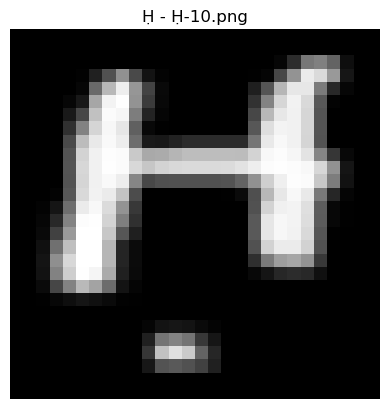

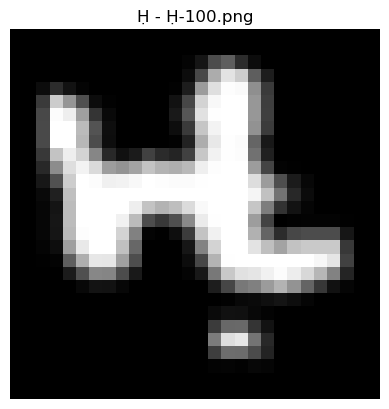

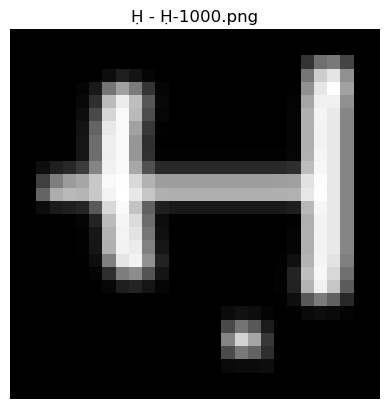

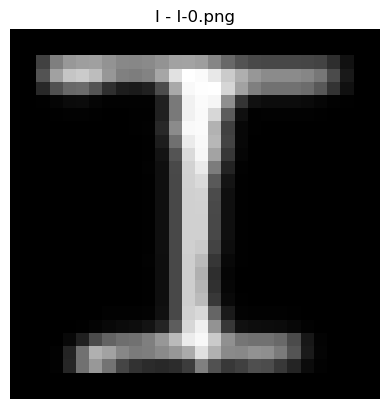

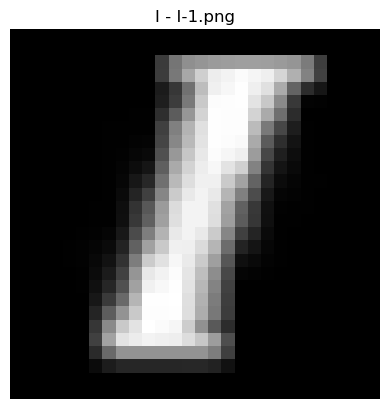

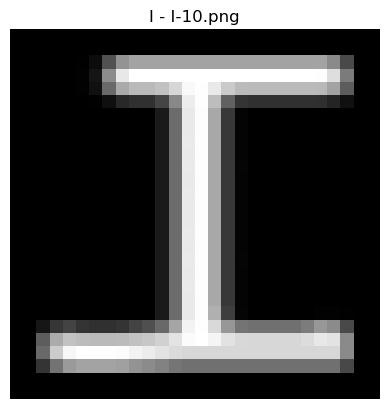

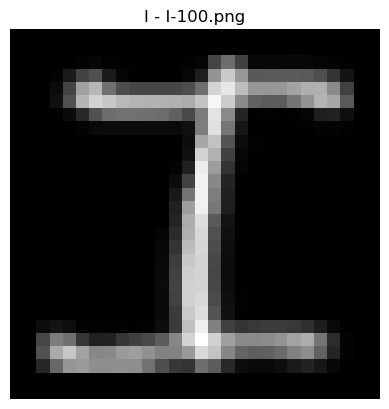

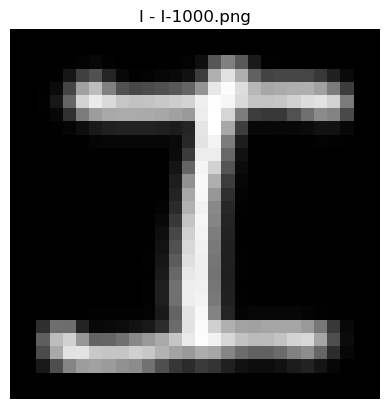

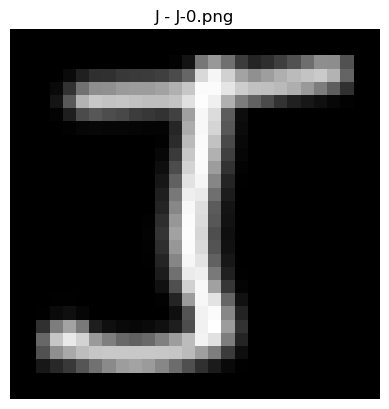

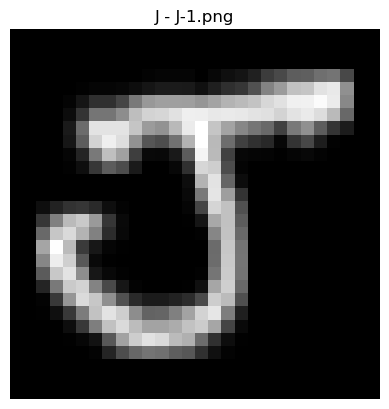

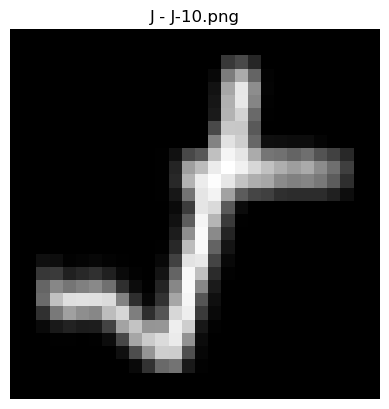

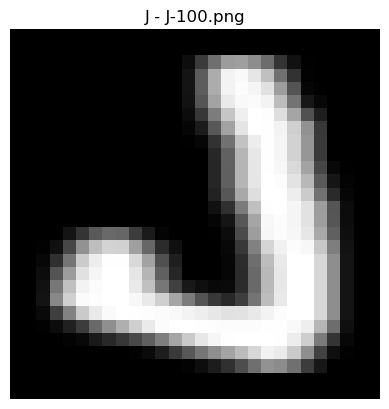

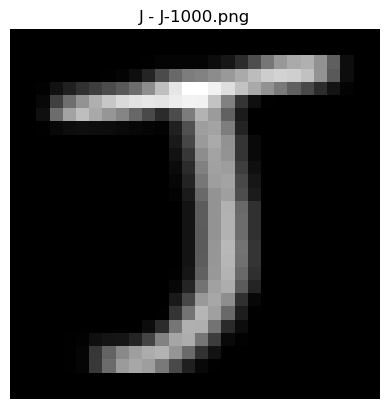

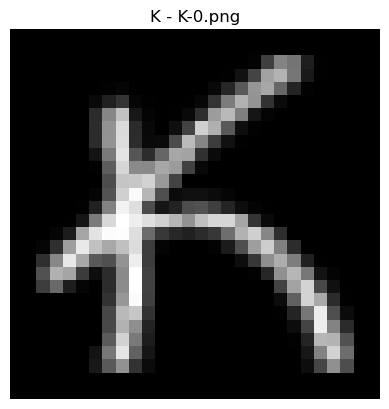

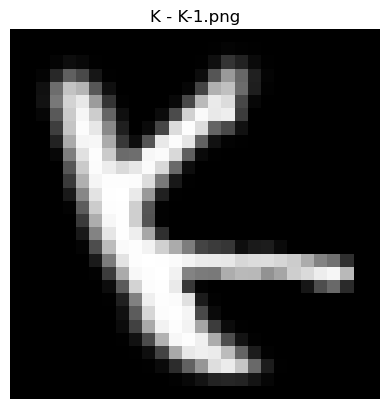

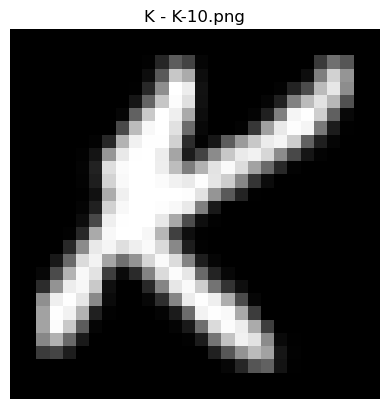

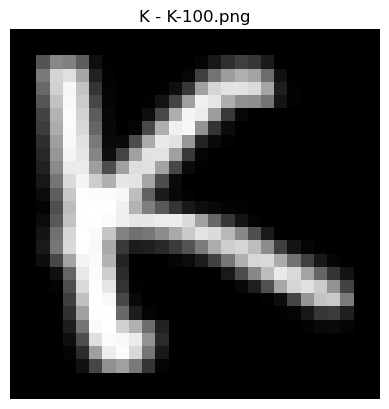

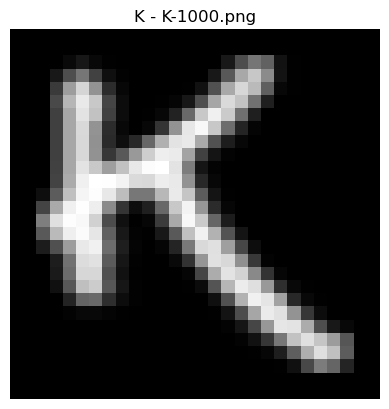

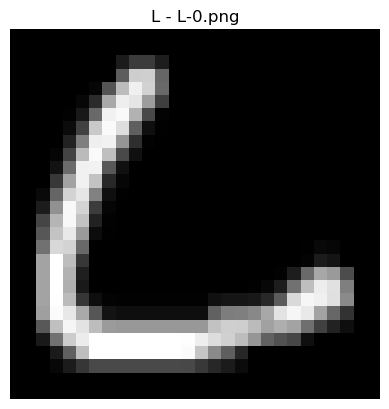

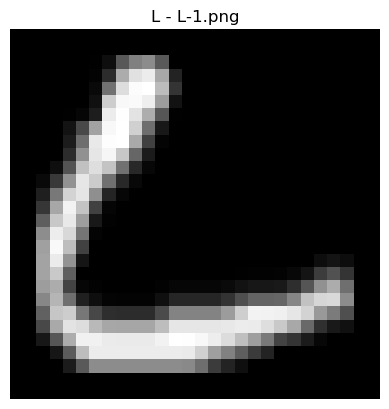

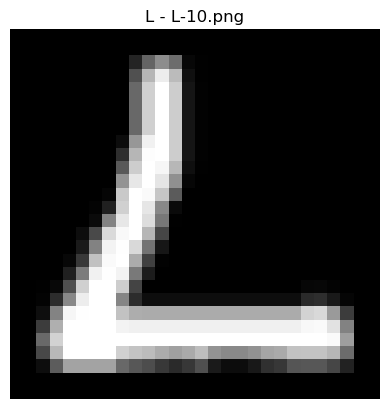

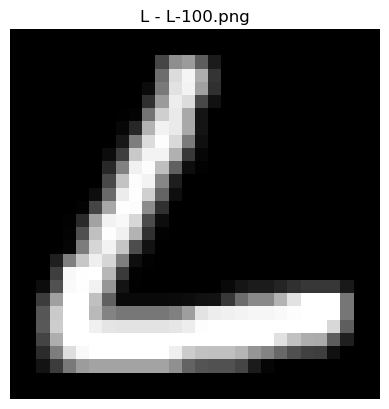

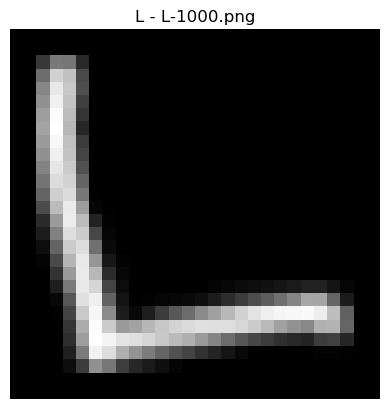

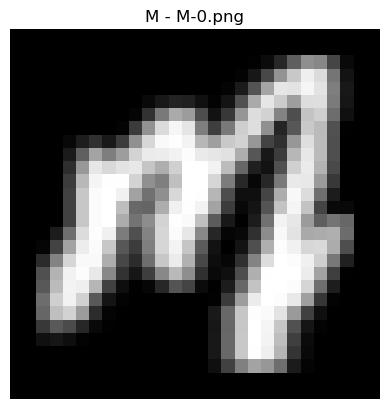

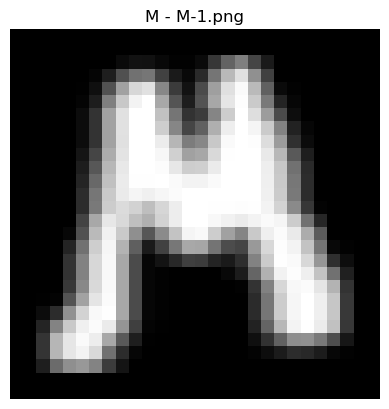

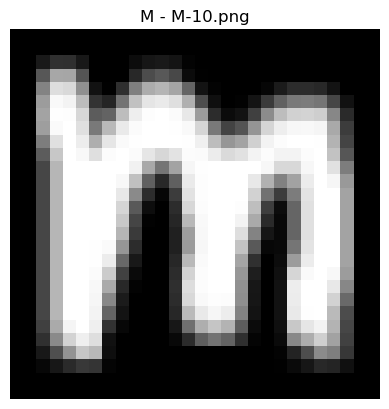

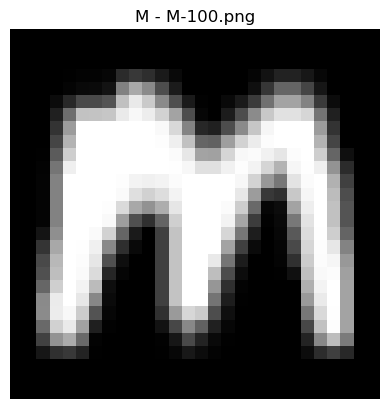

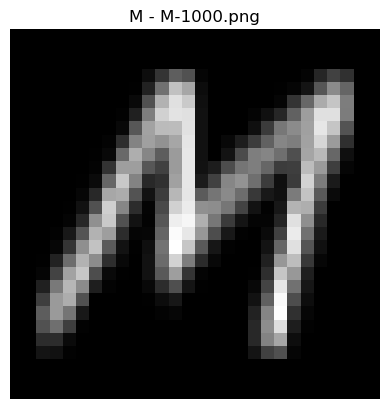

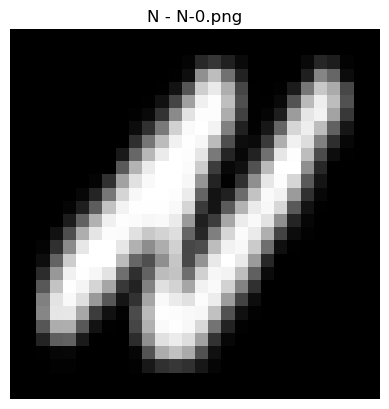

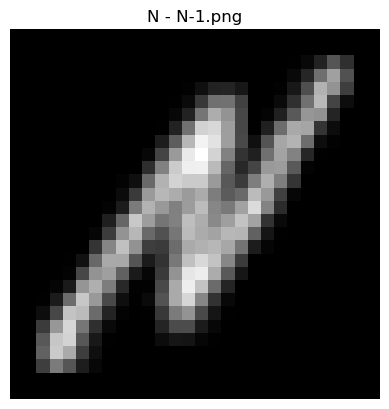

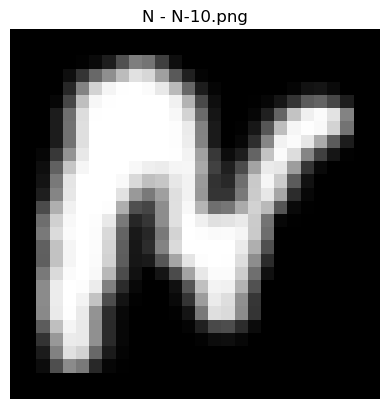

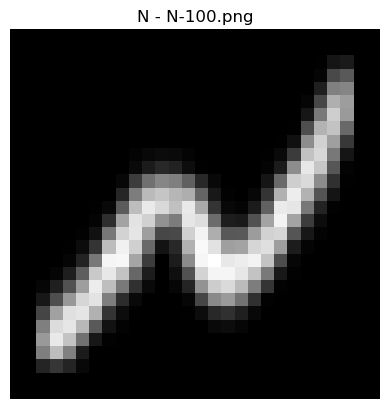

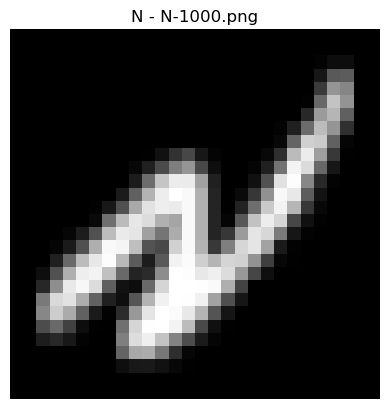

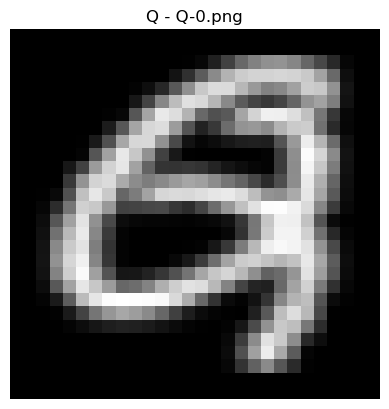

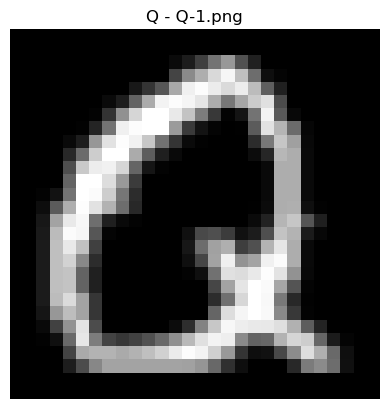

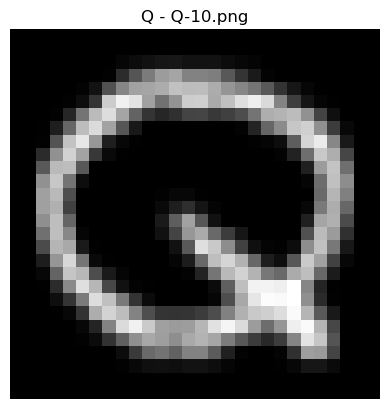

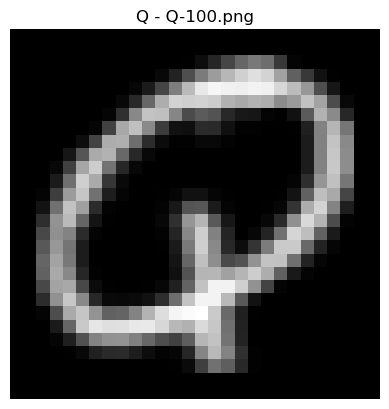

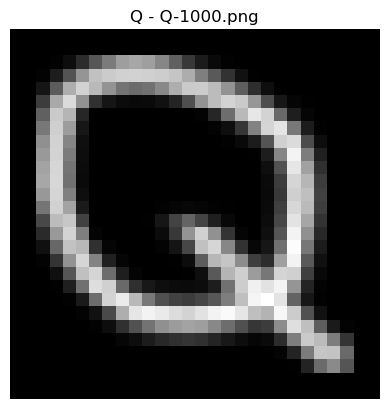

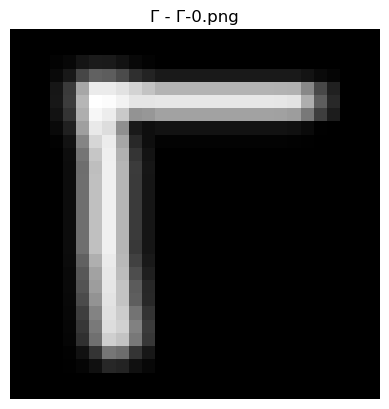

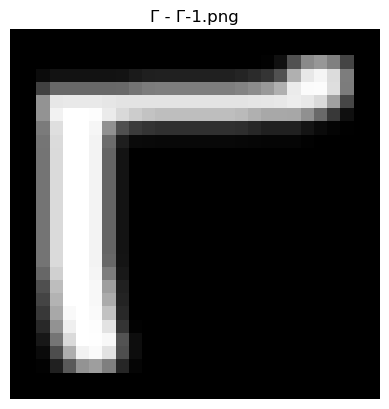

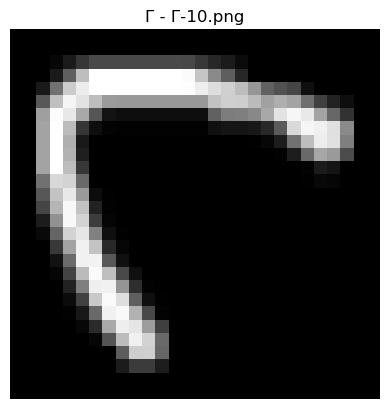

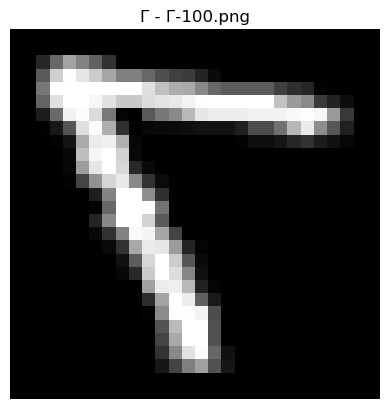

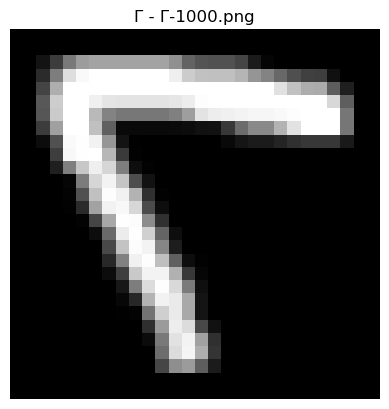

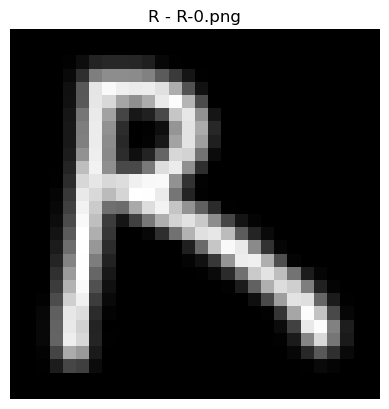

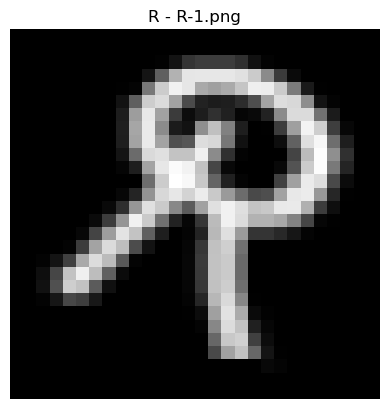

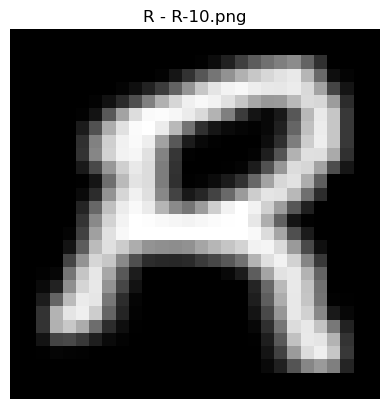

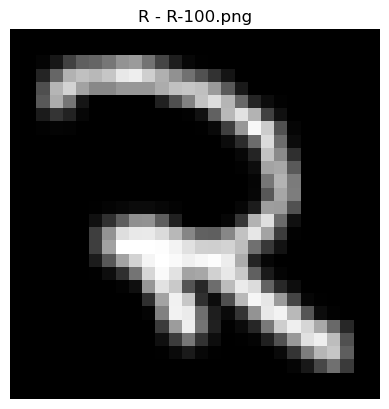

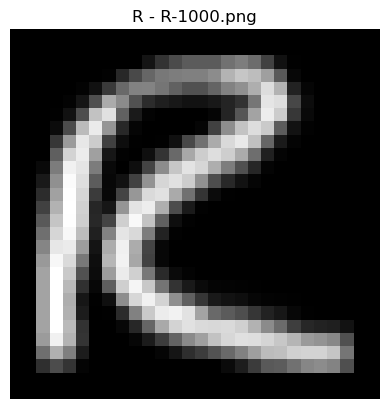

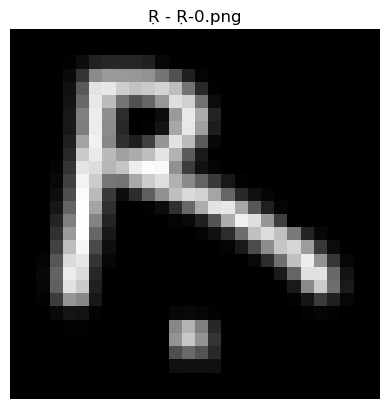

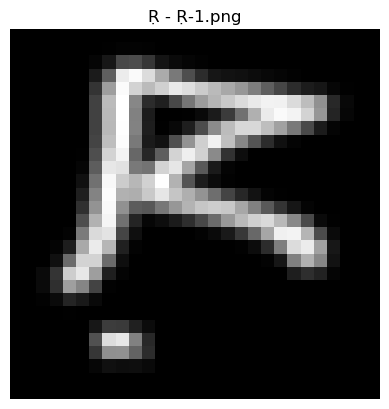

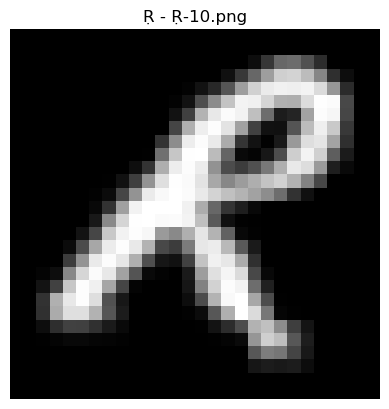

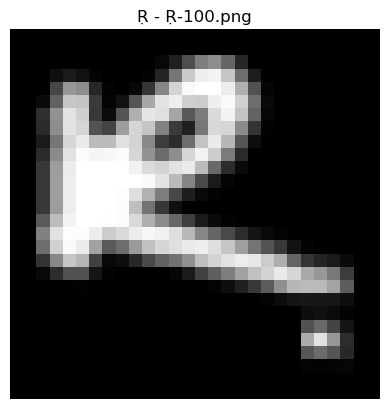

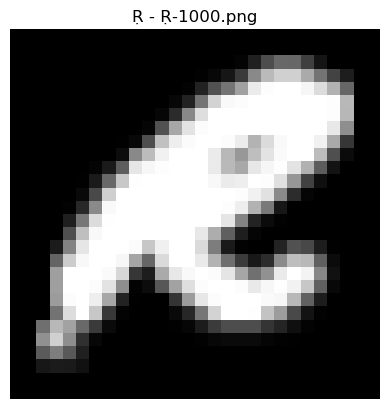

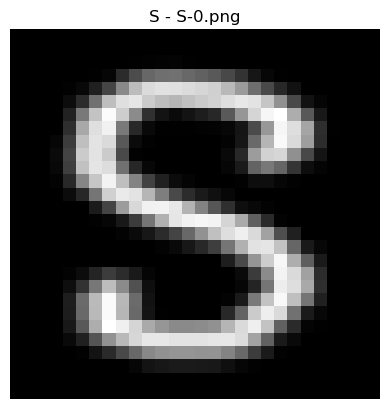

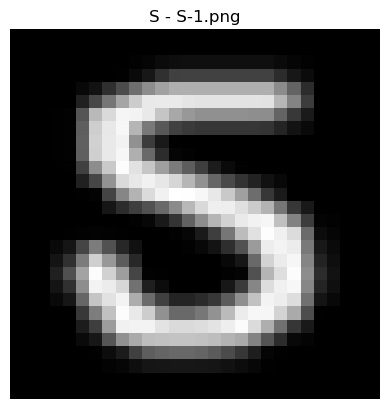

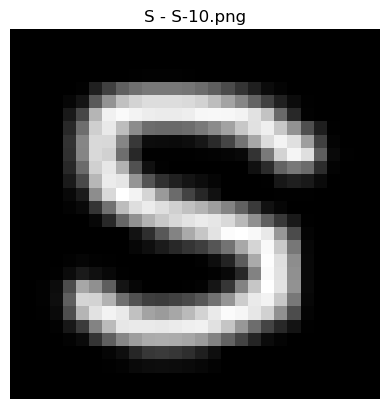

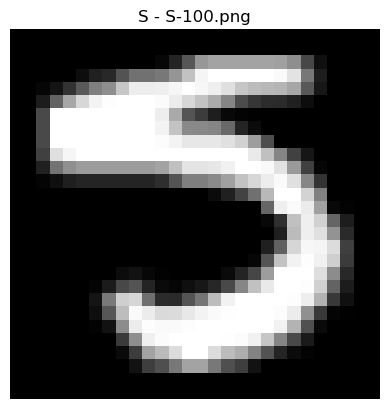

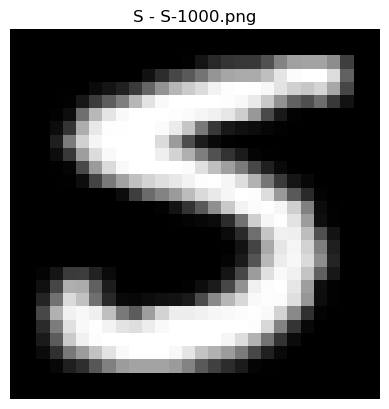

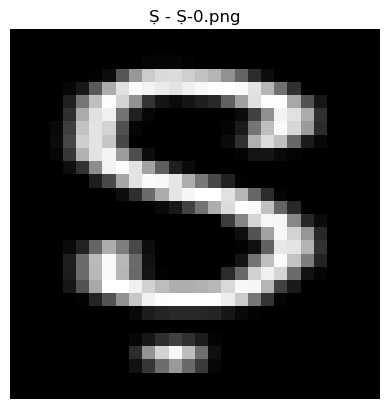

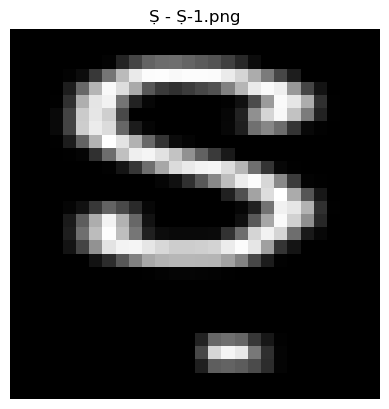

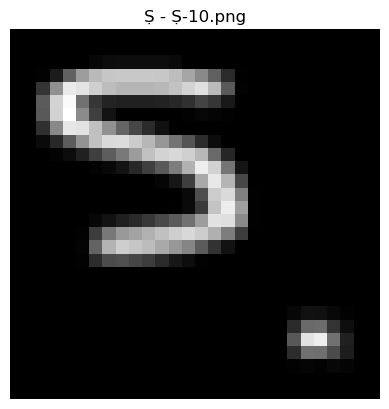

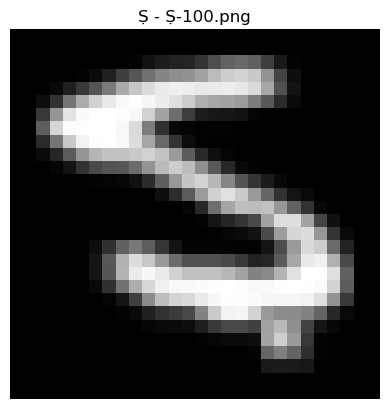

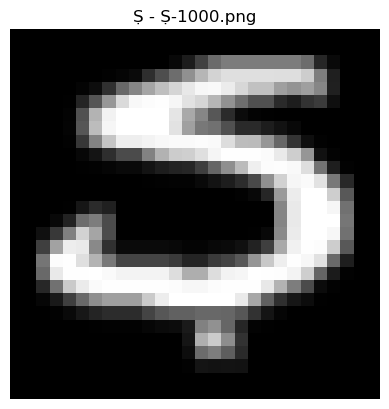

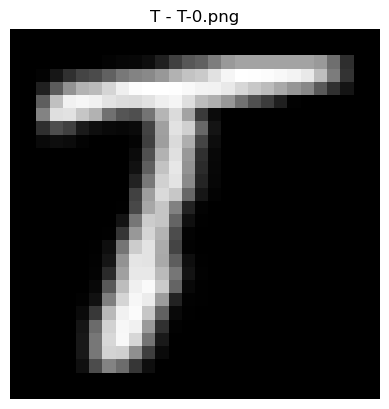

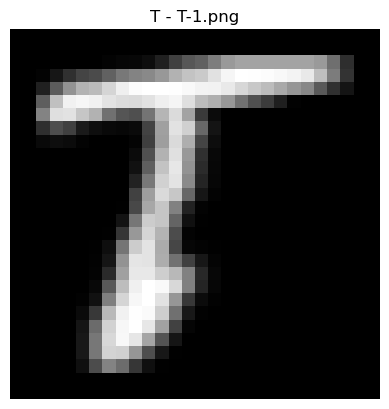

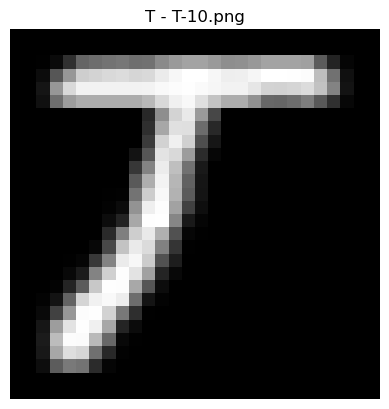

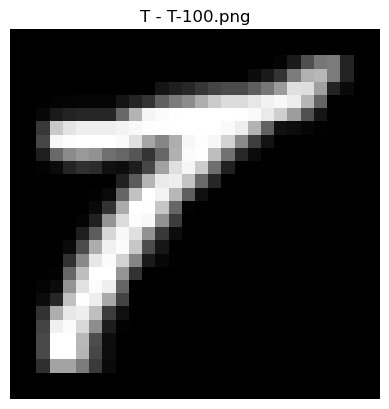

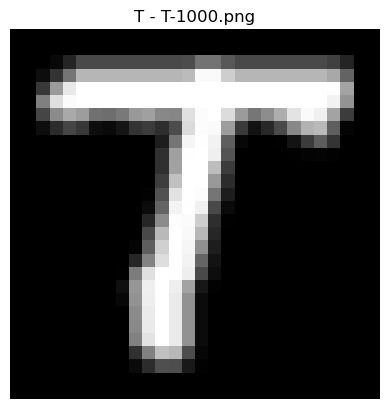

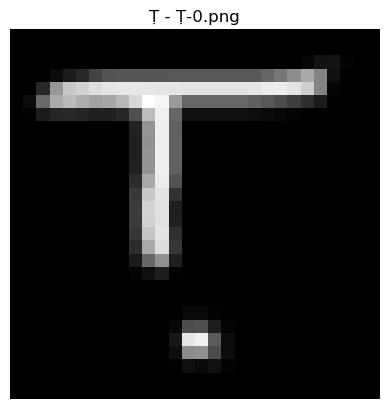

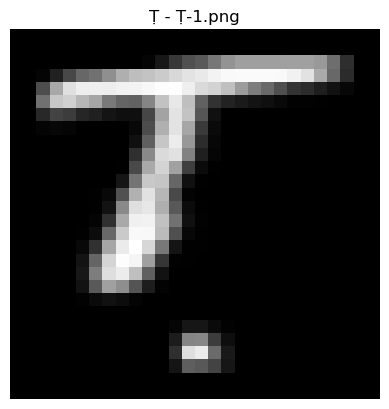

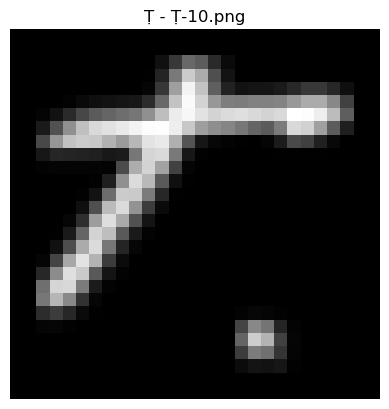

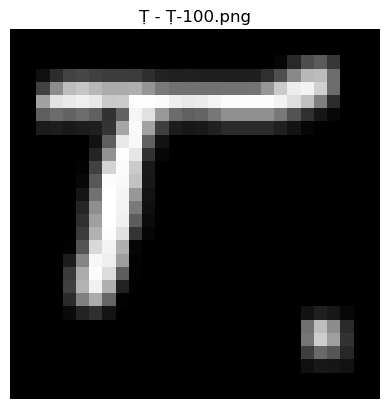

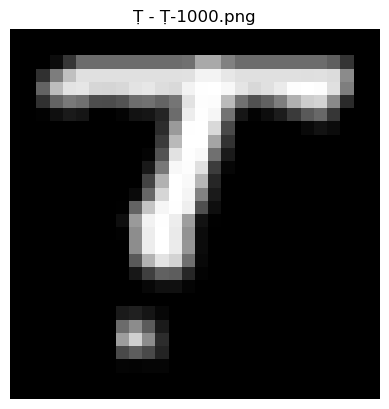

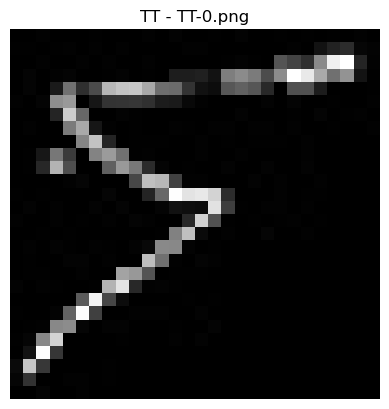

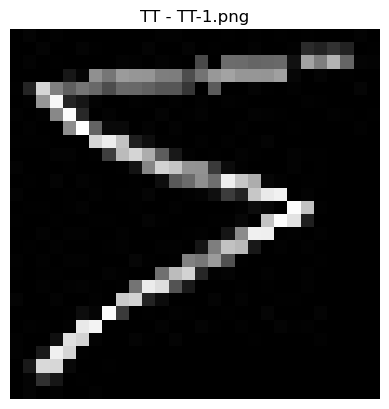

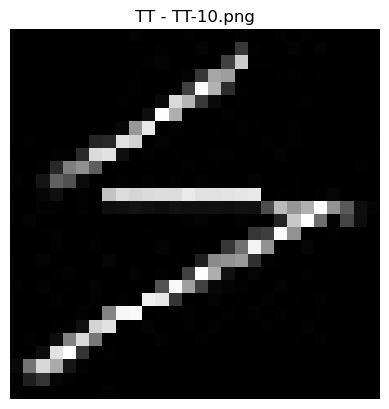

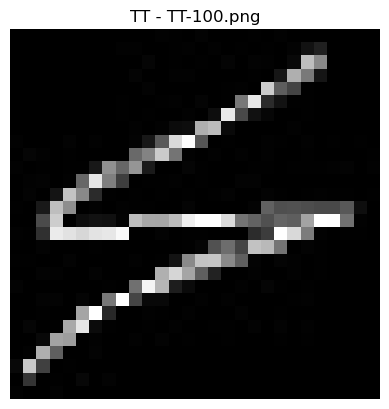

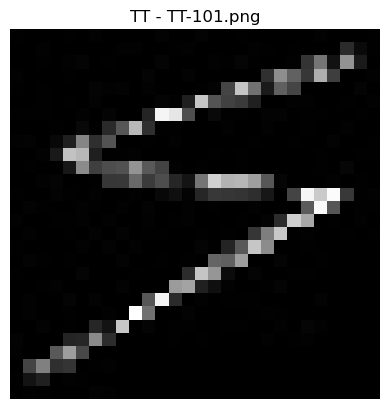

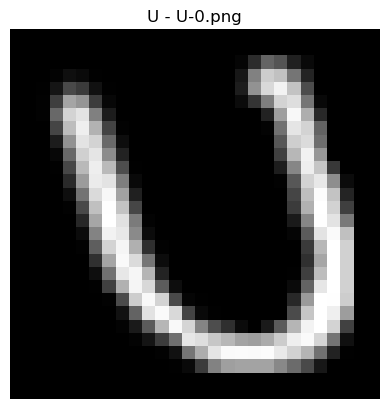

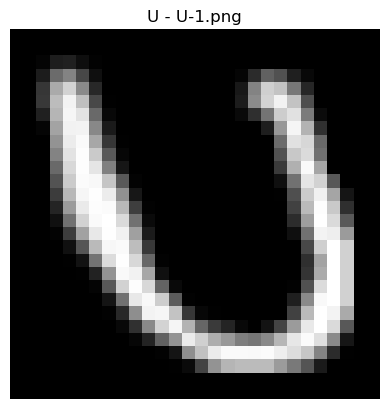

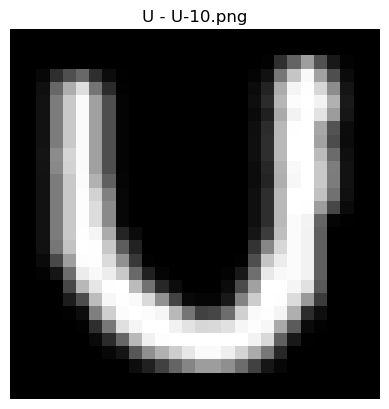

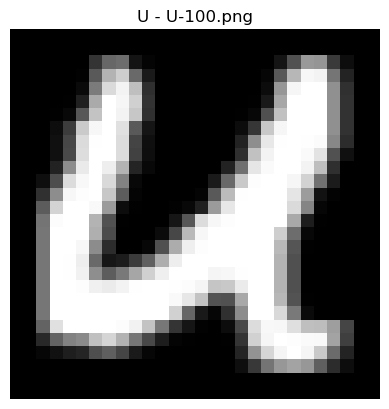

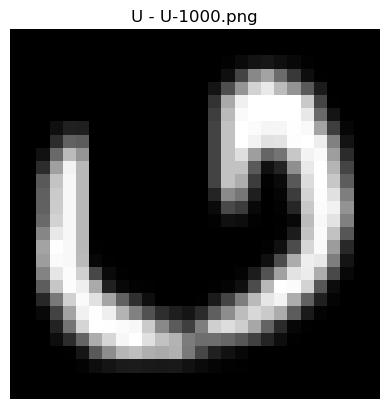

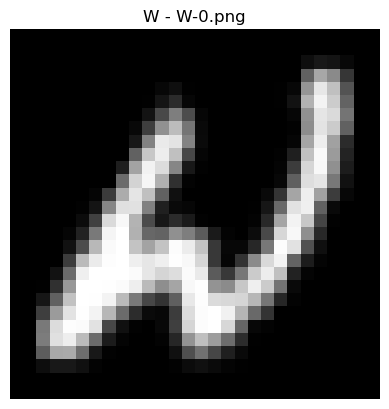

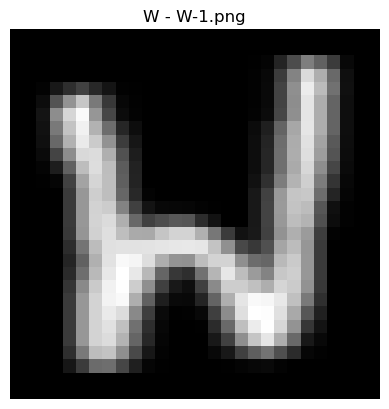

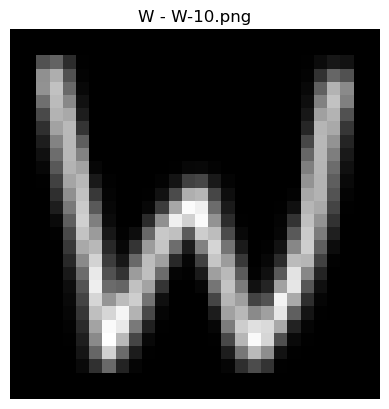

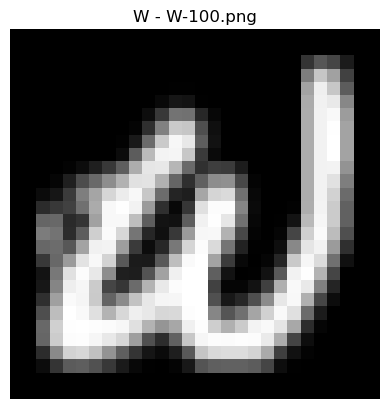

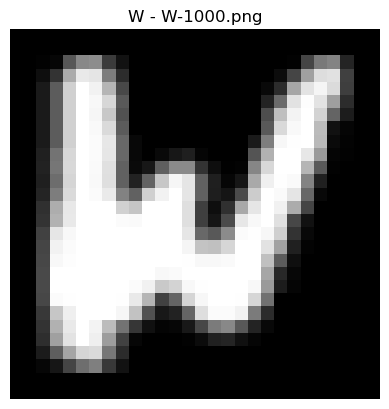

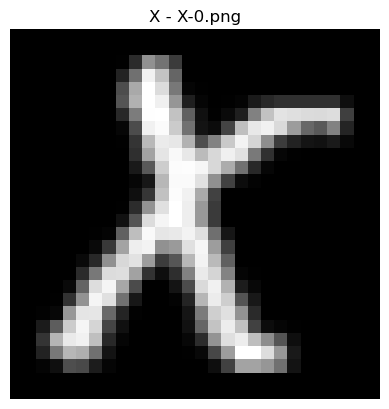

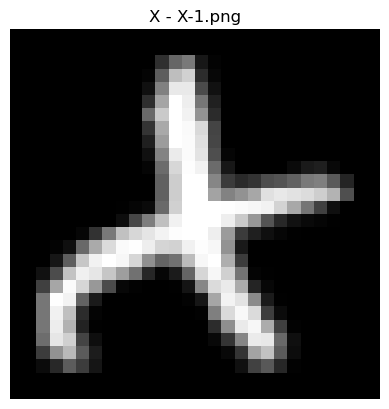

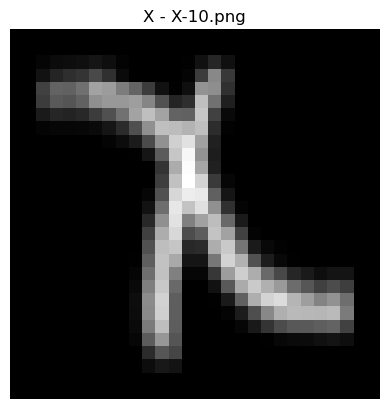

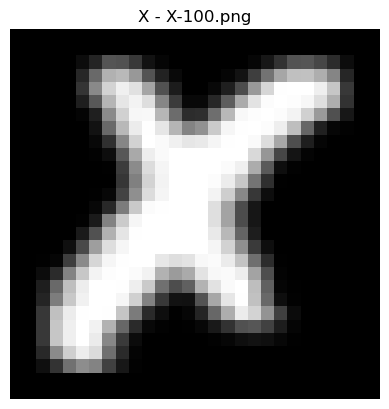

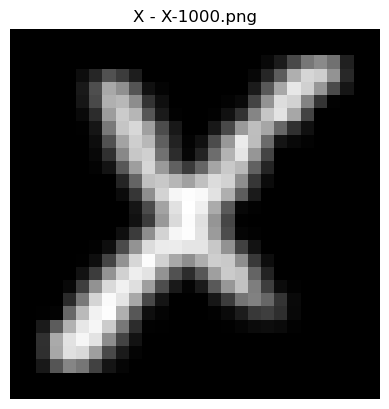

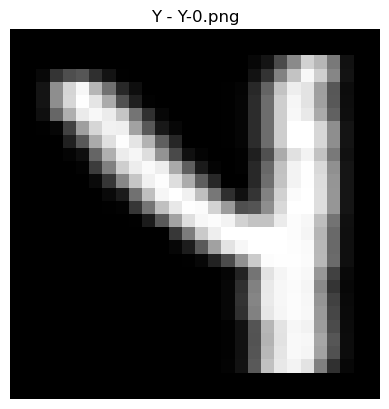

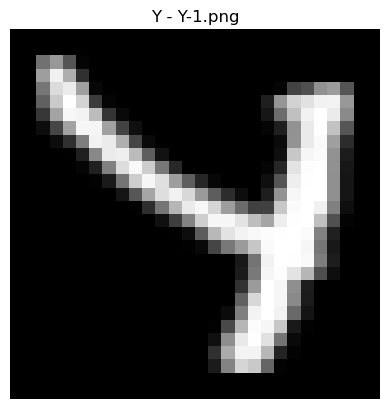

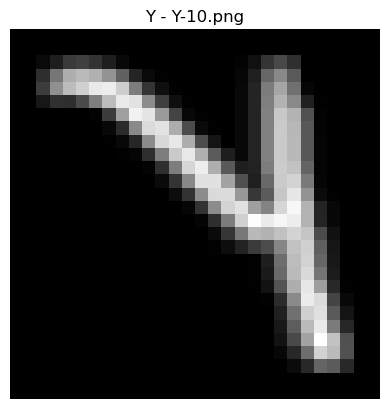

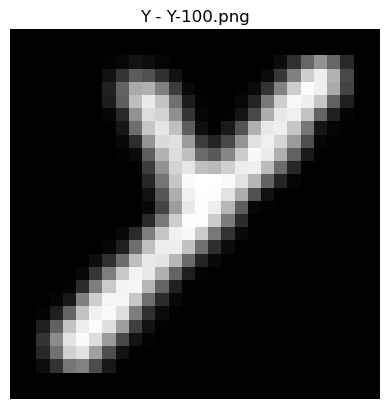

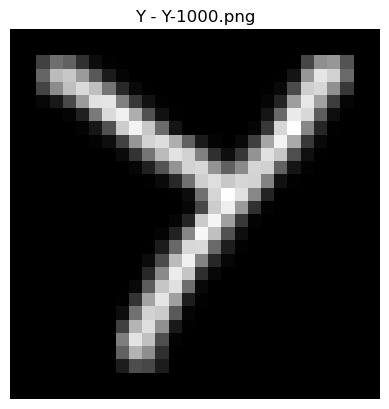

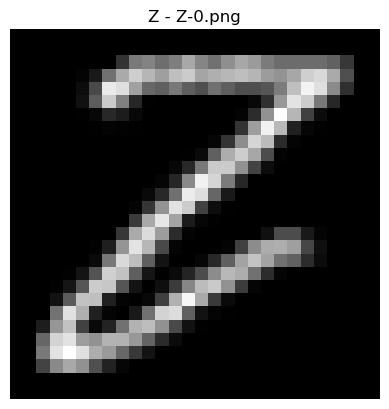

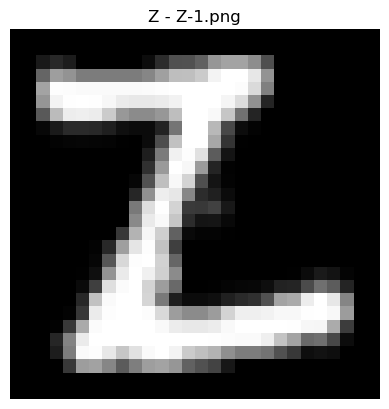

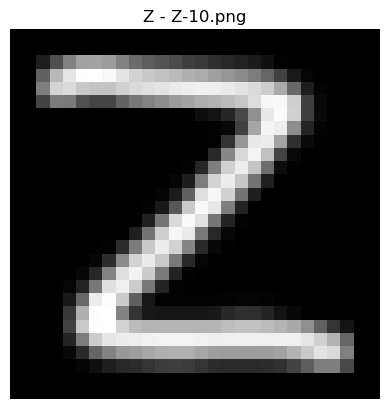

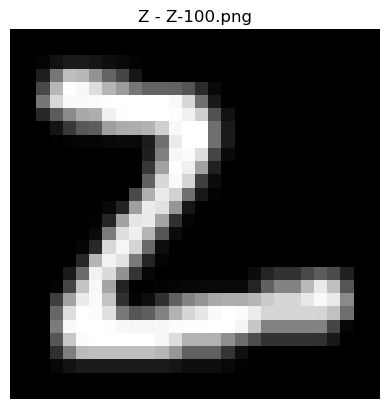

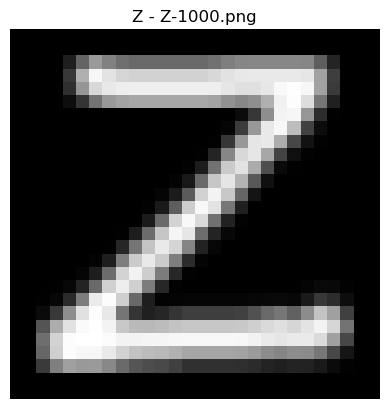

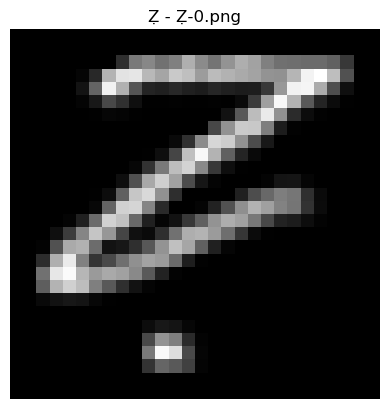

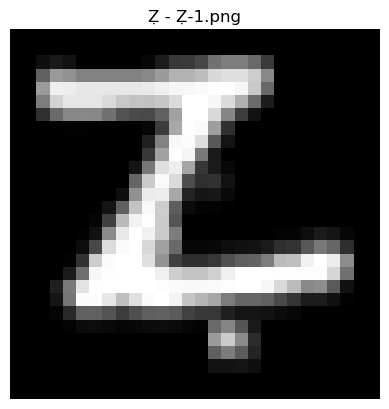

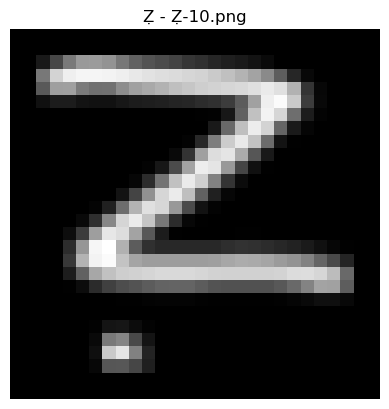

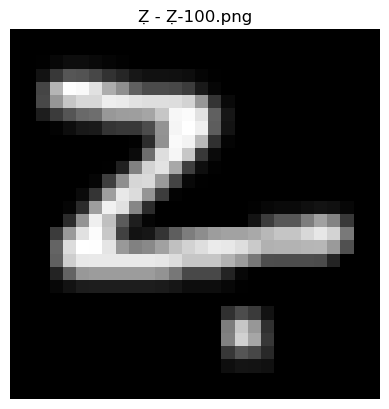

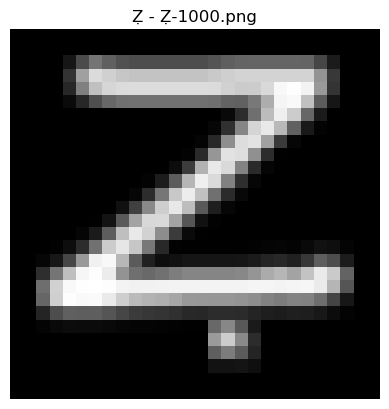

In [62]:
image_folder_path = "imgL"
alphabet_list = ["A","Ԑ","B","C","Č","D","Ḍ","E","F","G","Ǧ","H","Ḥ","I","J","K","L","M","N","Q","Γ","R","Ṛ","S","Ṣ","T","Ṭ",
                 "TT","U","W","X","Y","Z","Ẓ"]

# Looping through each alphabet and displaying images
for alphabet in alphabet_list:
    folder_path = os.path.join(image_folder_path, alphabet)
    images = os.listdir(folder_path)
    for img_name in images[:5]:  
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"{alphabet} - {img_name}")
        plt.axis('off')
        plt.show()


## Clustering

In [63]:
def load_and_process_images(image_folder):
    """Load images from specified folder, convert them to grayscale, resize, normalize, and return as numpy arrays."""
    images = []
    labels = []
    for label in os.listdir(image_folder):
        class_folder = os.path.join(image_folder, label)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                with Image.open(img_path) as img:
                    img = img.convert('L').resize((28, 28), Image.LANCZOS)
                    img_array = np.array(img, dtype=np.float32).flatten() / 255.0
                    images.append(img_array)
                    labels.append(label)
    return np.array(images), np.array(labels)

def visualize_data(images, labels, title):
    """Visualize average images per class and perform PCA."""
    unique_labels = set(labels)
    cols = 10
    rows = (len(unique_labels) + cols - 1) // cols

    # Average images per class
    plt.figure(figsize=(20, 2 * rows))
    for i, label in enumerate(sorted(unique_labels)):
        mean_image = np.mean(images[np.array(labels) == label], axis=0)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(mean_image.reshape(28, 28), cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f'Average Images for {title}')
    plt.show()

    # PCA visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(images)
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pd.factorize(labels)[0], alpha=0.5, cmap='viridis')
    plt.title(f'PCA for {title}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

# Defining paths to the datasets
tifinagh_folder = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Tifinagh-version/imgT"
latin_amazigh_folder = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Latin-version/imgL"

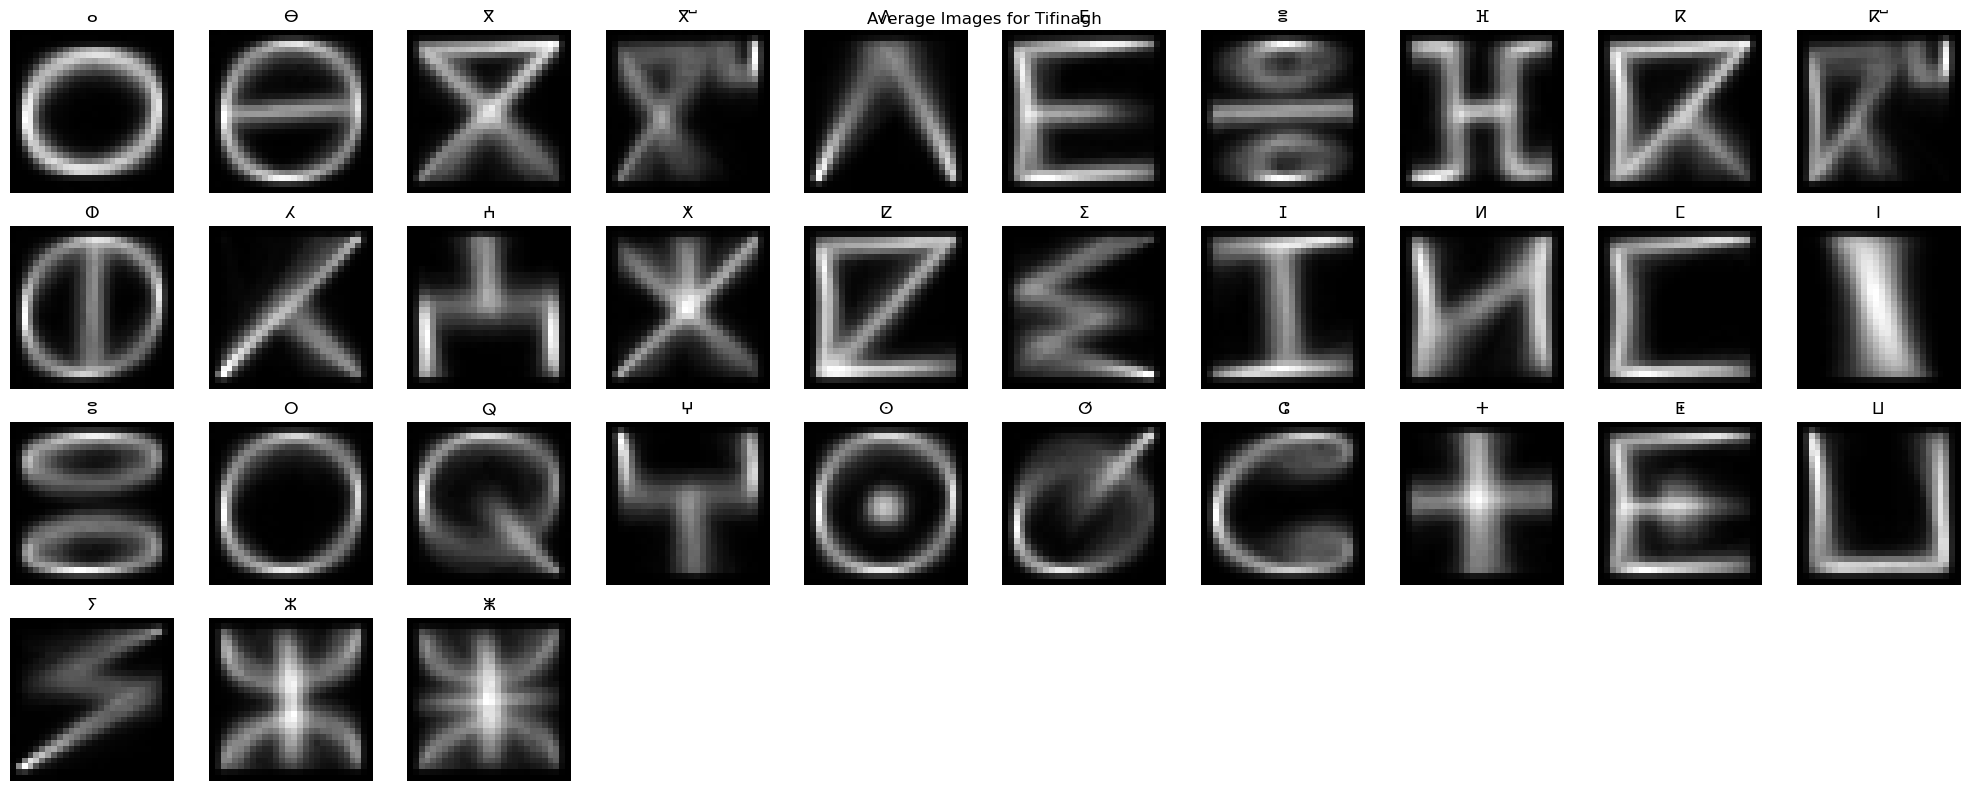

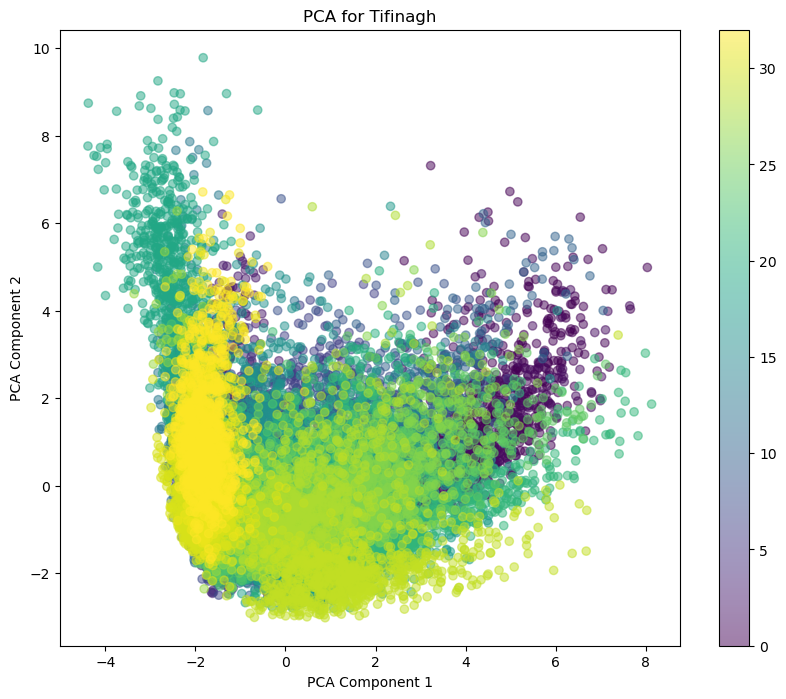

In [64]:
# Processing Tifinagh data
tifinagh_images, tifinagh_labels = load_and_process_images(tifinagh_folder)
visualize_data(tifinagh_images, tifinagh_labels, "Tifinagh")

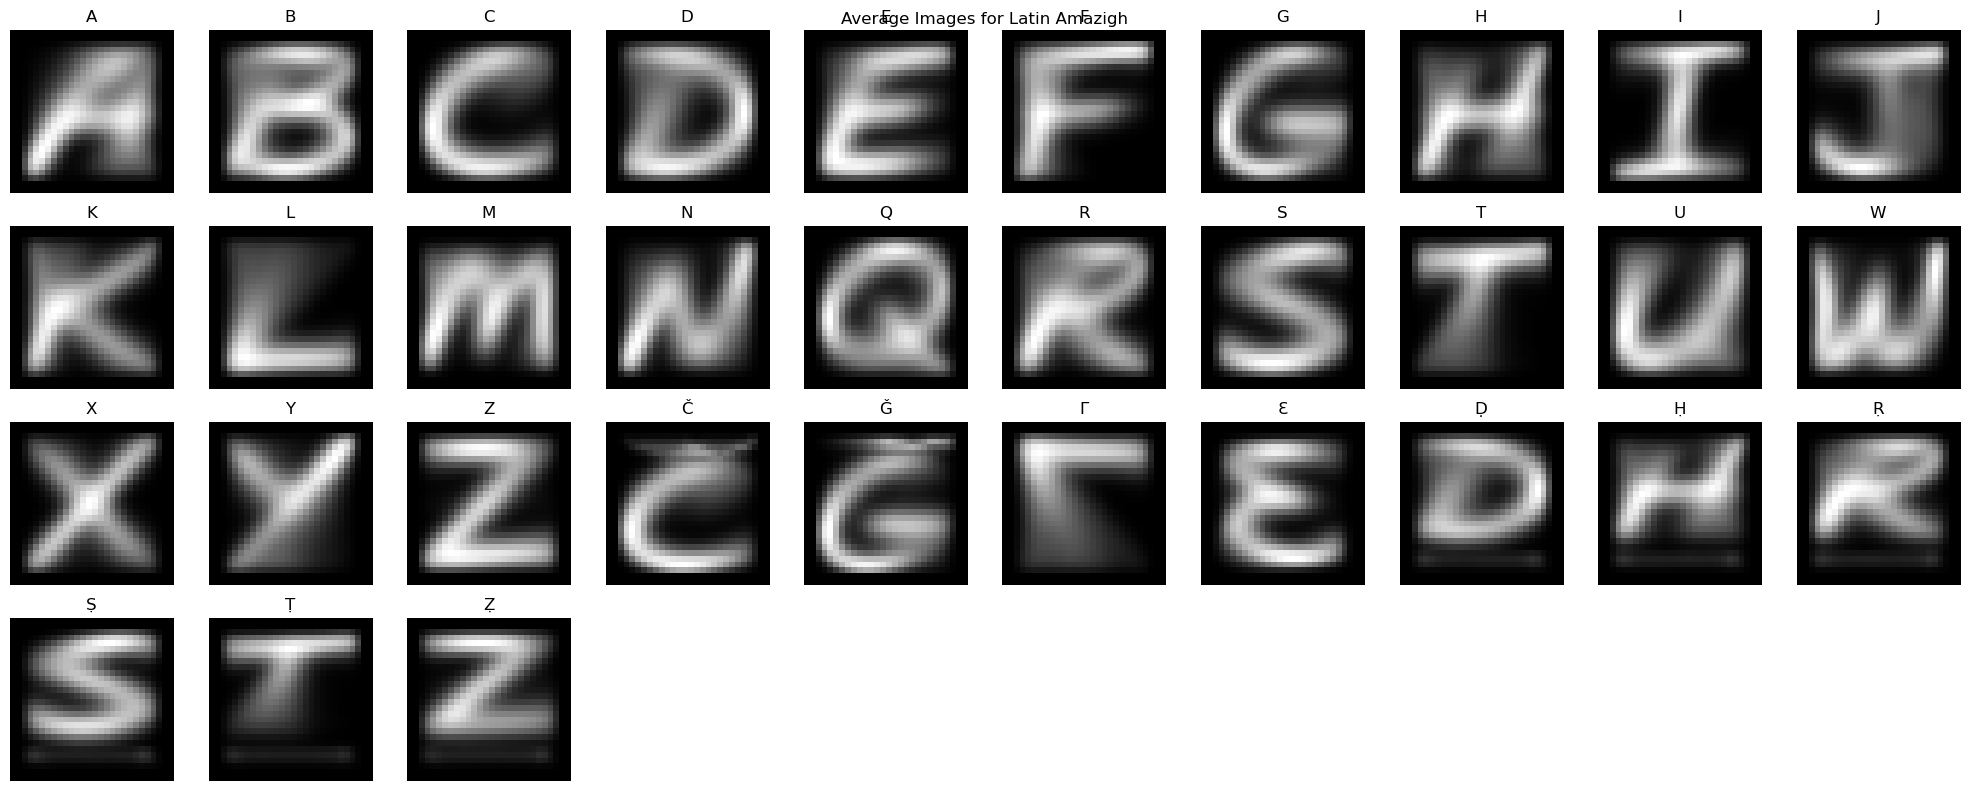

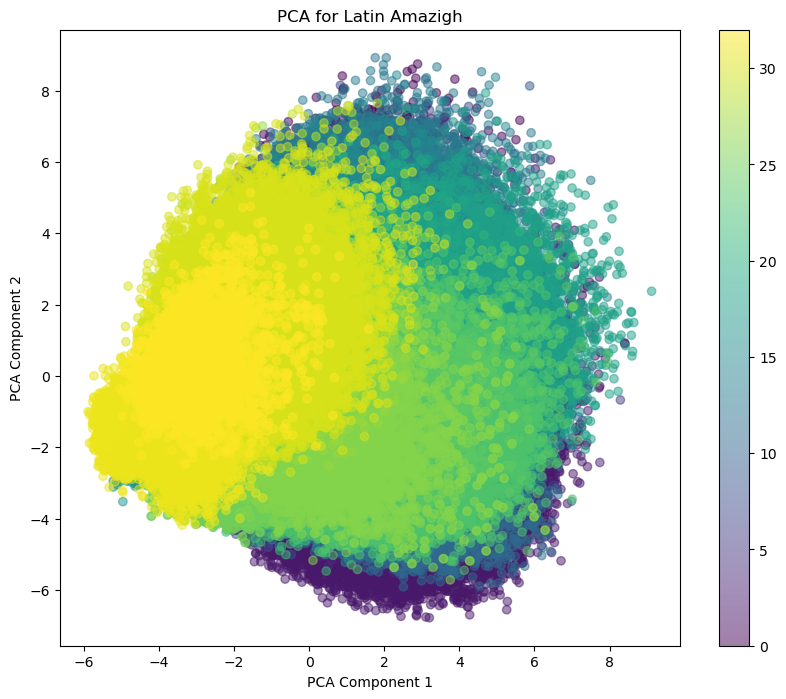

In [65]:
# Processing Latin Amazigh data
latin_images, latin_labels = load_and_process_images(latin_amazigh_folder)
visualize_data(latin_images, latin_labels, "Latin Amazigh")

# Exploratory Data Analysis

In [68]:
tifinagh_path = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Tifinagh-version/imgT"  # Path to the Tifinagh dataset folder
latin_path = "C:/Users/bouad/OneDrive/Bureau/Amazigh NLP/MNIST-BERBER/Latin-version/imgL"  # Path to the Latin dataset folder


def dataset_statistics(data_path):
    total_samples = 0
    class_counts = {}
    pixel_means = []
    pixel_stds = []

    for label in os.listdir(data_path):
        class_folder = os.path.join(data_path, label)
        if not os.path.isdir(class_folder):
            continue
        num_samples = len(os.listdir(class_folder))
        class_counts[label] = num_samples
        total_samples += num_samples

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            with Image.open(img_path) as img:
                img_array = np.array(img.convert('L')) / 255.0  # Normalize
                pixel_means.append(np.mean(img_array))
                pixel_stds.append(np.std(img_array))

    mean_pixel_value = np.mean(pixel_means)
    std_pixel_value = np.mean(pixel_stds)

    return total_samples, class_counts, mean_pixel_value, std_pixel_value

# Loading statistics for Tifinagh and Latin datasets
tifinagh_stats = dataset_statistics(tifinagh_path)
latin_stats = dataset_statistics(latin_path)

print(f"Tifinagh Dataset: Total Samples = {tifinagh_stats[0]}, Class Counts = {tifinagh_stats[1]}, Mean Pixel Value = {tifinagh_stats[2]:.4f}, Std Pixel Value = {tifinagh_stats[3]:.4f}")
print(f"Latin Dataset: Total Samples = {latin_stats[0]}, Class Counts = {latin_stats[1]}, Mean Pixel Value = {latin_stats[2]:.4f}, Std Pixel Value = {latin_stats[3]:.4f}")


Tifinagh Dataset: Total Samples = 25740, Class Counts = {'ⴰ': 780, 'ⴱ': 780, 'ⴳ': 780, 'ⴳⵯ': 780, 'ⴷ': 780, 'ⴹ': 780, 'ⴻ': 780, 'ⴼ': 780, 'ⴽ': 780, 'ⴽⵯ': 780, 'ⵀ': 780, 'ⵃ': 780, 'ⵄ': 780, 'ⵅ': 780, 'ⵇ': 780, 'ⵉ': 780, 'ⵊ': 780, 'ⵍ': 780, 'ⵎ': 780, 'ⵏ': 780, 'ⵓ': 780, 'ⵔ': 780, 'ⵕ': 780, 'ⵖ': 780, 'ⵙ': 780, 'ⵚ': 780, 'ⵛ': 780, 'ⵜ': 780, 'ⵟ': 780, 'ⵡ': 780, 'ⵢ': 780, 'ⵣ': 780, 'ⵥ': 780}, Mean Pixel Value = 0.1144, Std Pixel Value = 0.2482
Latin Dataset: Total Samples = 247985, Class Counts = {'A': 7680, 'B': 4804, 'C': 12134, 'D': 5310, 'E': 8977, 'F': 1147, 'G': 3146, 'H': 3932, 'I': 1062, 'J': 4586, 'K': 3131, 'L': 6203, 'M': 10367, 'N': 9906, 'Q': 3281, 'R': 6149, 'S': 24562, 'T': 11557, 'TT': 0, 'U': 14895, 'W': 5803, 'X': 3552, 'Y': 5817, 'Z': 3430, 'Č': 12134, 'Ǧ': 3145, 'Γ': 11459, 'Ԑ': 4875, 'Ḍ': 5310, 'Ḥ': 3932, 'Ṛ': 6148, 'Ṣ': 24564, 'Ṭ': 11557, 'Ẓ': 3430}, Mean Pixel Value = 0.2125, Std Pixel Value = 0.3282


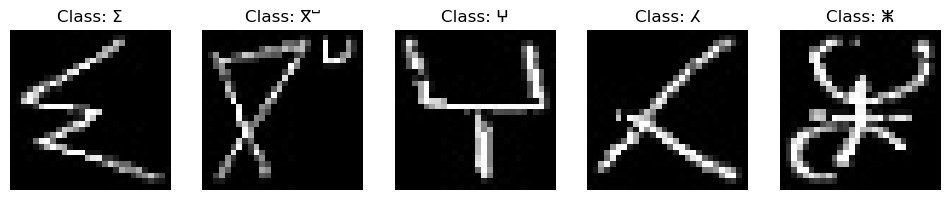

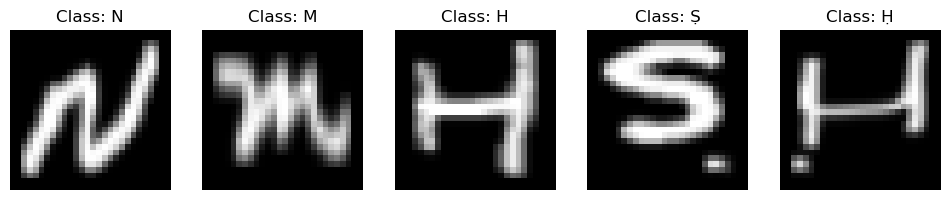

In [71]:
def show_sample_images(data_path, num_samples=5):
    plt.figure(figsize=(12, 6))
    
    #selecting classes Randomly
    labels = [label for label in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, label))]
    
    for i, label in enumerate(random.sample(labels, num_samples)):
        class_folder = os.path.join(data_path, label)
        sample_image_path = os.path.join(class_folder, random.choice(os.listdir(class_folder)))
        
        with Image.open(sample_image_path) as img:
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f'Class: {label}')
            plt.axis('off')
    
    plt.show()

# showing images samples
show_sample_images(tifinagh_path)
show_sample_images(latin_path)

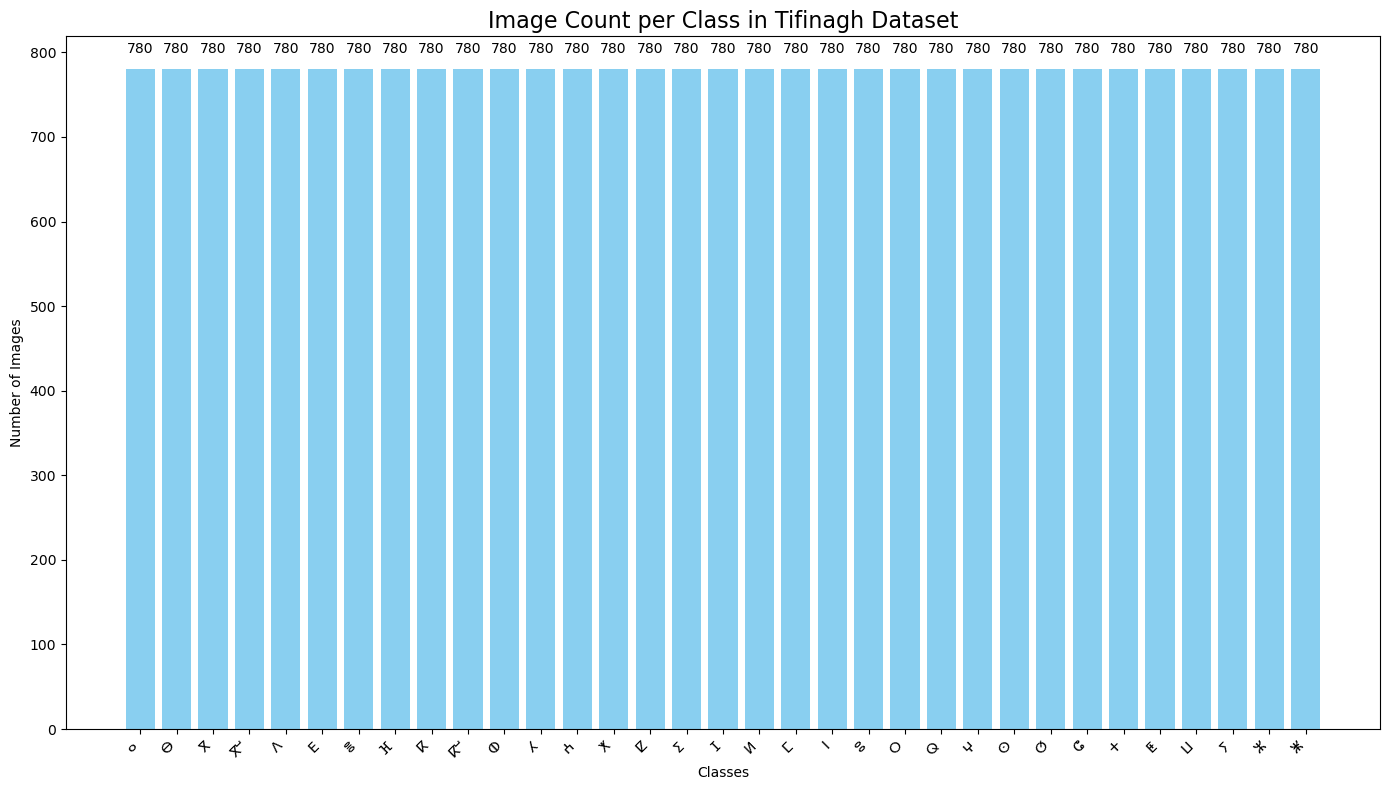

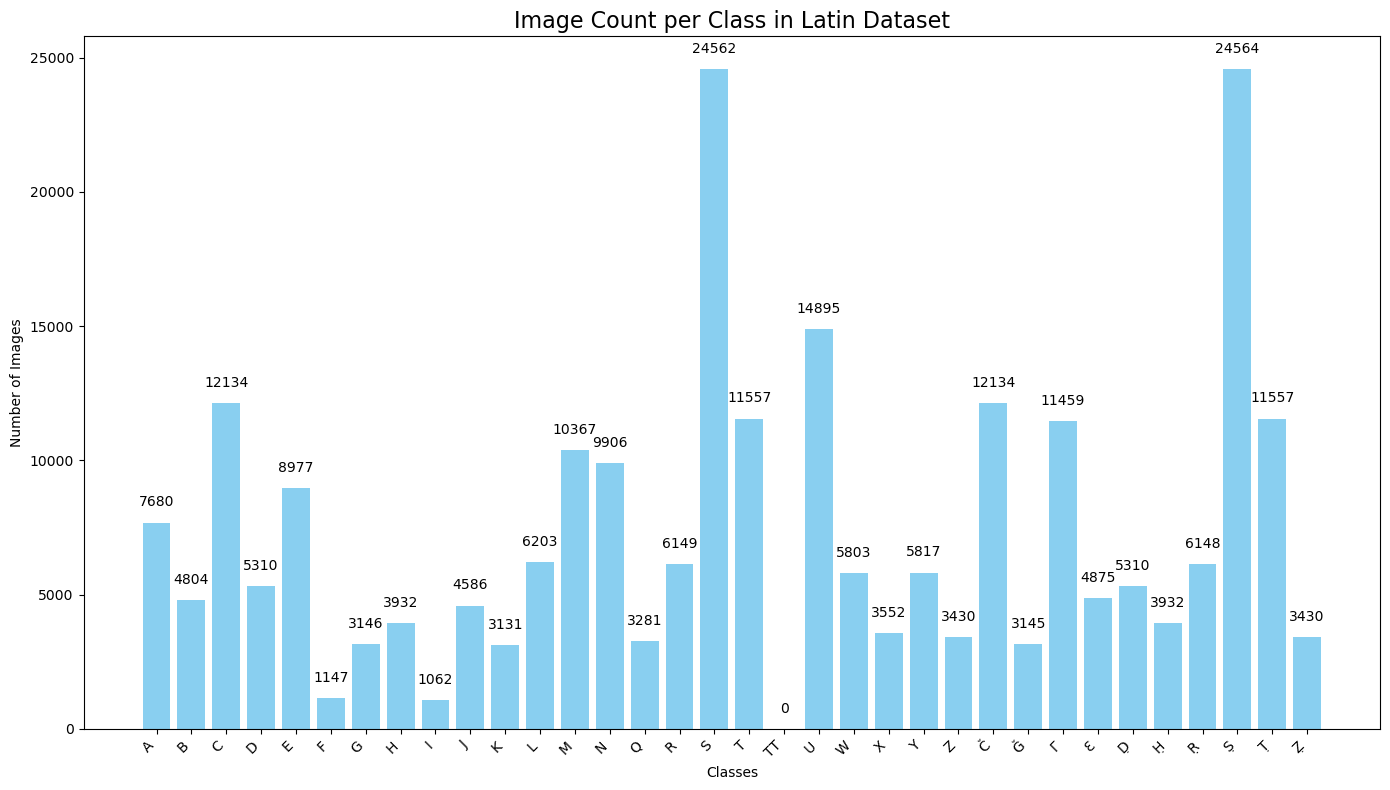

In [72]:
def plot_class_count_distribution(class_counts, title):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='#89CFF0')  # Set the color to baby blue
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')

    # Adding each image count on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * max(class_counts.values()), int(yval), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plotting class count distribution for both datasets
plot_class_count_distribution(tifinagh_stats[1], 'Image Count per Class in Tifinagh Dataset')
plot_class_count_distribution(latin_stats[1], 'Image Count per Class in Latin Dataset')
